### House Price Prediction 

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 

The company is looking at prospective properties to buy to enter the market. The company wants to know:
- Which variables are significant in predicting the price of a house
- How well those variables describe the price of a house.

Goal is to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.

In [210]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd #To work with dataset
import matplotlib.pyplot as plt#visualization
%matplotlib inline
import seaborn as sns#visualization
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [211]:
#Displays all the rows
pd.set_option('display.max_rows', None)
#Standardise precision
pd.options.display.float_format = "{:,.4f}".format
#Set style for plots
sns.set(style = "whitegrid")

In [212]:
#Read the input file 'train.csv'
df_house= pd.read_csv("train.csv")
#Display first few rows
df_house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL      65.0000     8450   Pave   NaN      Reg   
1   2          20       RL      80.0000     9600   Pave   NaN      Reg   
2   3          60       RL      68.0000    11250   Pave   NaN      IR1   
3   4          70       RL      60.0000     9550   Pave   NaN      IR1   
4   5          60       RL      84.0000    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [213]:
#Check the shape of the dataframe
df_house.shape

(1460, 81)

In [214]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [215]:
#Using the describe function, lets get the statistics on each numerical column
df_house.describe()

Id  MSSubClass  LotFrontage      LotArea  OverallQual  \
count 1,460.0000  1,460.0000   1,201.0000   1,460.0000   1,460.0000   
mean    730.5000     56.8973      70.0500  10,516.8281       6.0993   
std     421.6100     42.3006      24.2848   9,981.2649       1.3830   
min       1.0000     20.0000      21.0000   1,300.0000       1.0000   
25%     365.7500     20.0000      59.0000   7,553.5000       5.0000   
50%     730.5000     50.0000      69.0000   9,478.5000       6.0000   
75%   1,095.2500     70.0000      80.0000  11,601.5000       7.0000   
max   1,460.0000    190.0000     313.0000 215,245.0000      10.0000   

       OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  \
count   1,460.0000 1,460.0000    1,460.0000  1,452.0000  1,460.0000  ...   
mean        5.5753 1,971.2678    1,984.8658    103.6853    443.6397  ...   
std         1.1128    30.2029       20.6454    181.0662    456.0981  ...   
min         1.0000 1,872.0000    1,950.0000      0.0000      0.0000  ...   
25%         5.0000 1,954.0000    1,967.0000      0.0000      0.0000  ...   
50%         5.0000 1,973.0000    1,994.0000      0.0000    383.5000  ...   
75%         6.0000 2,000.0000    2,004.0000    166.0000    712.2500  ...   
max         9.0000 2,010.0000    2,010.0000  1,600.0000  5,644.0000  ...   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count  1,460.0000   1,460.0000     1,460.0000 1,460.0000   1,460.0000   
mean      94.2445      46.6603        21.9541     3.4096      15.0610   
std      125.3388      66.2560        61.1191    29.3173      55.7574   
min        0.0000       0.0000         0.0000     0.0000       0.0000   
25%        0.0000       0.0000         0.0000     0.0000       0.0000   
50%        0.0000      25.0000         0.0000     0.0000       0.0000   
75%      168.0000      68.0000         0.0000     0.0000       0.0000   
max      857.0000     547.0000       552.0000   508.0000     480.0000   

        PoolArea     MiscVal     MoSold     YrSold    SalePrice  
count 1,460.0000  1,460.0000 1,460.0000 1,460.0000   1,460.0000  
mean      2.7589     43.4890     6.3219 2,007.8158 180,921.1959  
std      40.1773    496.1230     2.7036     1.3281  79,442.5029  
min       0.0000      0.0000     1.0000 2,006.0000  34,900.0000  
25%       0.0000      0.0000     5.0000 2,007.0000 129,975.0000  
50%       0.0000      0.0000     6.0000 2,008.0000 163,000.0000  
75%       0.0000      0.0000     8.0000 2,009.0000 214,000.0000  
max     738.0000 15,500.0000    12.0000 2,010.0000 755,000.0000  

[8 rows x 38 columns]

In [216]:
# Count the number of missing values in each column of the dataset
df_house.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [217]:
# Counting the number of rows have all missing values
print('Number of empty Rows:')
print(df_house.isnull().all(axis=1).sum())
# --> There are no empty rows in whole dataset.

# Counting the number of columns have all missing values
print('Number of empty Columns:')
print(df_house.isnull().all(axis=0).sum())

# --> There are no empty columns in whole dataset.

Number of empty Rows:
0
Number of empty Columns:
0


In [218]:
#Find the percentage of Null values in all columns in descending order for easy tracking
round((df_house.isnull().sum()/len(df_house.index))*100,2).sort_values(ascending=False)

PoolQC          99.5200
MiscFeature     96.3000
Alley           93.7700
Fence           80.7500
FireplaceQu     47.2600
LotFrontage     17.7400
GarageYrBlt      5.5500
GarageCond       5.5500
GarageType       5.5500
GarageFinish     5.5500
GarageQual       5.5500
BsmtFinType2     2.6000
BsmtExposure     2.6000
BsmtQual         2.5300
BsmtCond         2.5300
BsmtFinType1     2.5300
MasVnrArea       0.5500
MasVnrType       0.5500
Electrical       0.0700
Id               0.0000
Functional       0.0000
Fireplaces       0.0000
KitchenQual      0.0000
KitchenAbvGr     0.0000
BedroomAbvGr     0.0000
HalfBath         0.0000
FullBath         0.0000
BsmtHalfBath     0.0000
TotRmsAbvGrd     0.0000
GarageCars       0.0000
GrLivArea        0.0000
GarageArea       0.0000
PavedDrive       0.0000
WoodDeckSF       0.0000
OpenPorchSF      0.0000
EnclosedPorch    0.0000
3SsnPorch        0.0000
ScreenPorch      0.0000
PoolArea         0.0000
MiscVal          0.0000
MoSold           0.0000
YrSold          

Even though there are more than 50% null values we are not going to delete them. Will review the data dictionary and then proceed.

In [219]:
#Print only the columns which has missing values
df_house.columns[(df_house.isnull().sum() != 0)]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [220]:
#Analyze the values in the columns which has missing values
print("LotFrontage unique values: ",len(pd.unique(df_house["LotFrontage"])))
print("MasVnrType unique values: ",len(pd.unique(df_house["MasVnrType"])))
print("MasVnrArea unique values: ",len(pd.unique(df_house["MasVnrArea"])))
print("BsmtQual unique values: ",len(pd.unique(df_house["BsmtQual"])))
print("BsmtCond unique values: ",len(pd.unique(df_house["BsmtCond"])))
print("BsmtExposure unique values: ",len(pd.unique(df_house["BsmtExposure"])))
print("BsmtFinType1 unique values: ",len(pd.unique(df_house["BsmtFinType1"])))
print("BsmtFinType2 unique values: ",len(pd.unique(df_house["BsmtFinType2"])))
print("Electrical unique values: ",len(pd.unique(df_house["Electrical"])))
print("FireplaceQu unique values: ",len(pd.unique(df_house["FireplaceQu"])))
print("GarageType unique values: ",len(pd.unique(df_house["GarageType"])))
print("GarageYrBlt unique values: ",len(pd.unique(df_house["GarageYrBlt"])))
print("GarageFinish unique values: ",len(pd.unique(df_house["GarageFinish"])))
print("GarageQual unique values: ",len(pd.unique(df_house["GarageQual"])))
print("GarageCond unique values: ",len(pd.unique(df_house["GarageCond"])))
print("PoolQC unique values: ",len(pd.unique(df_house["PoolQC"])))
print("MiscFeature unique values: ",len(pd.unique(df_house["MiscFeature"])))
print("Fence unique values: ",len(pd.unique(df_house["Fence"])))
print("Alley unique values: ",len(pd.unique(df_house["Alley"])))


LotFrontage unique values:  111
MasVnrType unique values:  5
MasVnrArea unique values:  328
BsmtQual unique values:  5
BsmtCond unique values:  5
BsmtExposure unique values:  5
BsmtFinType1 unique values:  7
BsmtFinType2 unique values:  7
Electrical unique values:  6
FireplaceQu unique values:  6
GarageType unique values:  7
GarageYrBlt unique values:  98
GarageFinish unique values:  4
GarageQual unique values:  6
GarageCond unique values:  6
PoolQC unique values:  4
MiscFeature unique values:  5
Fence unique values:  5
Alley unique values:  3


Analyze the columns from data dictionary

- LotFrontage: Linear feet of street connected to property
- MasVnrType : Masonry veneer type(BrkCmn	Brick Common,BrkFace	Brick Face,CBlock	Cinder Block,None	None,Stone	Stone)
- MasVnrArea : Masonry veneer area in square feet
- BsmtQual : Evaluates the height of the basement(Ex	Excellent, Gd	Good, TA	Typical/Average, Fa	Fair, Po	Poor,NA	No Garage)
- BsmtCond : Evaluates the general condition of the basement(Ex	Excellent, Gd	Good, TA	Typical/Average, Fa	Fair, Po	Poor,NA	No Garage)
- BsmtExposure : Refers to walkout or garden level walls(Gd,Av,Mn,No,NA)
- BsmtFinType1 : Rating of basement finished area((GLQ,ALQ,BLQ,Rec,LwQ,Unf,NA))
- BsmtFinType2 : Rating of basement finished area(GLQ,ALQ,BLQ,Rec,LwQ,Unf,NA)
- Electrical : Electrical system ( SBrkr, FuseA	, FuseF	,FuseP	,Mix)
- FireplaceQu : Fireplace quality(Ex	Excellent, Gd	Good, TA	Typical/Average, Fa	Fair, Po	Poor,NA	No Garage)
- GarageType : Garage location(2Types	More than one type of garage,Attchd	Attached to home, Basment	Basement Garage
BuiltIn	Built-In (Garage part of house - typically has room above garage), CarPort	Car Port, Detchd	Detached from home,
NA	No Garage)
- GarageYrBlt :Year garage was built
- GarageFinish : Interior finish of the garage(Fin	Finished, RFn	Rough Finished, Unf	Unfinished, NA	No Garage)
- GarageQual : Garage quality (Ex	Excellent, Gd	Good, TA	Typical/Average, Fa	Fair, Po	Poor,NA	No Garage)
- GarageCond : Garage condition(Ex	Excellent, Gd	Good, TA	Typical/Average, Fa	Fair, Po	Poor,NA	No Garage)
- Alley: Type of alley access to property(Grvl	Gravel,,Pave	Paved, NA 	No alley access)
- PoolQC: Pool quality(Ex	Excellent, Gd	Good, TA	Average/Typical, Fa	Fair, NA	No Pool)		
- Fence: Fence quality(GdPrv	Good Privacy, MnPrv	Minimum Privacy,GdWo	Good Wood, MnWw	Minimum Wood/Wire,NA	No Fence)
- MiscFeature: Miscellaneous feature not covered in other categories (Elev	Elevator,Gar2	2nd Garage (if not described in garage section),Othr	Other,Shed	Shed (over 100 SF), TenC	Tennis Court,NA	None)

In [221]:
#Check the values present in the columns which has less number of unique values from above output
print("\nMasVnrType unique values: ",pd.unique(df_house["MasVnrType"]))
print("\nBsmtQual unique values: ",pd.unique(df_house["BsmtQual"]))
print("\nBsmtCond unique values: ",pd.unique(df_house["BsmtCond"]))
print("\nBsmtExposure unique values: ",pd.unique(df_house["BsmtExposure"]))
print("\nBsmtFinType1 unique values: ",pd.unique(df_house["BsmtFinType1"]))
print("\nBsmtFinType2 unique values: ",pd.unique(df_house["BsmtFinType2"]))
print("\nElectrical unique values: ",pd.unique(df_house["Electrical"]))
print("\nFireplaceQu unique values: ",pd.unique(df_house["FireplaceQu"]))
print("\nGarageType unique values: ",pd.unique(df_house["GarageType"]))
print("\nGarageFinish unique values: ",pd.unique(df_house["GarageFinish"]))
print("\nGarageQual unique values: ",pd.unique(df_house["GarageQual"]))
print("\nGarageCond unique values: ",pd.unique(df_house["GarageCond"]))
print("\nPoolQC unique values: ",pd.unique(df_house["PoolQC"]))
print("\nMiscFeature unique values: ",pd.unique(df_house["MiscFeature"]))
print("\nFence unique values: ",pd.unique(df_house["Fence"]))
print("\nAlley unique values: ",pd.unique(df_house["Alley"]))



MasVnrType unique values:  ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]

BsmtQual unique values:  ['Gd' 'TA' 'Ex' nan 'Fa']

BsmtCond unique values:  ['TA' 'Gd' nan 'Fa' 'Po']

BsmtExposure unique values:  ['No' 'Gd' 'Mn' 'Av' nan]

BsmtFinType1 unique values:  ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']

BsmtFinType2 unique values:  ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']

Electrical unique values:  ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]

FireplaceQu unique values:  [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']

GarageType unique values:  ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']

GarageFinish unique values:  ['RFn' 'Unf' 'Fin' nan]

GarageQual unique values:  ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']

GarageCond unique values:  ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']

PoolQC unique values:  [nan 'Ex' 'Fa' 'Gd']

MiscFeature unique values:  [nan 'Shed' 'Gar2' 'Othr' 'TenC']

Fence unique values:  [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']

Alley unique values:  [nan 'Grvl' 'Pave']


In [222]:
#As per data dictionary the columns'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' are nan because there is No Garage'. So replacing NA(Not Applicable) with it.
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df_house[col].fillna('NA', inplace=True)

#'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond' are NAN when there is 'No Basement'. So replacing NA(Not Applicable) with it
for col in ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']:
    df_house[col].fillna('NA', inplace=True)

In [223]:
# As per data dictionary the columns 'PoolQC','MiscFeature','Fence','Alley' are nan when there is no pool,no fence, no alley.So replacing nans with NA
df_house["PoolQC"].fillna('NA', inplace=True)
df_house["MiscFeature"].fillna('NA', inplace=True)
df_house["Fence"].fillna('NA', inplace=True)
df_house["Alley"].fillna('NA', inplace=True)

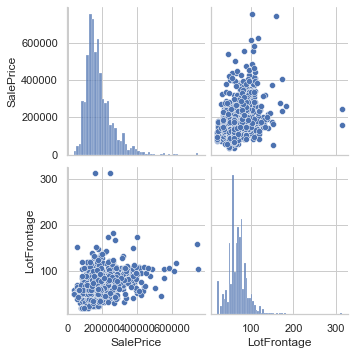

In [224]:
#Let's see how 'LotFrontage' column related tro target variable SalePrice
sns.pairplot(df_house[['SalePrice','LotFrontage']])
plt.show()

LotFrontage
 count   1,201.0000
mean       70.0500
std        24.2848
min        21.0000
25%        59.0000
50%        69.0000
75%        80.0000
max       313.0000
Name: LotFrontage, dtype: float64


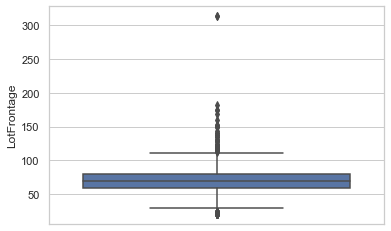

In [225]:
#Checking the values for LotFrontage using describe()
print("LotFrontage\n", df_house.LotFrontage.describe())
#Create a boxplot for the LotFrontage
sns.boxplot(y=df_house.LotFrontage)
plt.show()

In [226]:
#LotFrontage is a numerical column and from the above plots it looks like linearly related with Sale Price to some extent
#and there are outliers as per box plot.Imputing median value for missing columns
df_house["LotFrontage"].fillna(df_house.LotFrontage.median(), inplace=True)

In [227]:
# MAsVnrType columns has only 8 values missing. Since it is low in number removing those rows from the data as we have sufficient data for analysis rather than imputing
df_house=df_house[~(df_house.MasVnrType.isnull())]

In [228]:
#FireplaceQu NA mean No fireplace
df_house.FireplaceQu.fillna('NA', inplace=True)

In [229]:
#df_house.Electrical.value_counts()
#SBrkr    1326,FuseA      94,FuseF      27,FuseP       3,Mix         1
#For electrical only one value is missing.So deleting the row
df_house=df_house[~df_house.Electrical.isna()]

In [230]:
#'Id' is an identifier and is not helpful inour analysis. So let's drop the column
df_house.drop('Id', axis = 1, inplace = True)
df_house.shape

(1451, 80)

In [231]:
# Let's drop duplicate columns if any present in data set 
df_house = df_house.drop_duplicates()
df_house.shape

(1451, 80)

In [232]:
df_house.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [233]:
# As per the following outputs 
#GrLivArea=1stFlrSF+2ndFlrSF
#TotalBsmtSF=BsmtFinSF1+BsmtFinSF2+BsmtUnfSF
df_house[["1stFlrSF","GrLivArea","2ndFlrSF","TotalBsmtSF","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF"]].head(10)

1stFlrSF  GrLivArea  2ndFlrSF  TotalBsmtSF  BsmtFinSF1  BsmtFinSF2  \
0       856       1710       854          856         706           0   
1      1262       1262         0         1262         978           0   
2       920       1786       866          920         486           0   
3       961       1717       756          756         216           0   
4      1145       2198      1053         1145         655           0   
5       796       1362       566          796         732           0   
6      1694       1694         0         1686        1369           0   
7      1107       2090       983         1107         859          32   
8      1022       1774       752          952           0           0   
9      1077       1077         0          991         851           0   

   BsmtUnfSF  
0        150  
1        284  
2        434  
3        540  
4        490  
5         64  
6        317  
7        216  
8        952  
9        140

In [234]:
# Renaming few columns for better readibility

df_house.rename(columns={'YrSold':'YearSold','MoSold':'MonthSold'}, inplace=True)

In [235]:
#Create new features named HouseAge,RemodelAge,GarageAge from the existing features YearBuilt, YrSold, YearRemodAdd,GarageYrBlt 
df_house["HouseAge"]=df_house["YearSold"]-df_house['YearBuilt']
df_house["RemodelAge"]=df_house["YearSold"]-df_house["YearRemodAdd"]
df_house["GarageAge"]=df_house["YearSold"]-df_house["GarageYrBlt"]
#Imputing 0 for missing values which indicates there is no garage
df_house.GarageAge.fillna(0, inplace=True)
#As we found the age of the houses using YearBuilt,YearRemodAdd and GarageYrBlt columns, dropping these columns to avoid redundancy
df_house.drop(df_house[["YearBuilt","YearRemodAdd","GarageYrBlt"]],axis=1,inplace=True)

# Converting the YearSold,MoSold,MSSubClass to Category types since they are categorical features and should not be treated as numerical features
df_house[['MSSubClass','YearSold','MonthSold',"OverallQual","OverallCond"]] = df_house[['MSSubClass','YearSold','MonthSold',"OverallQual","OverallCond"]].astype('category')


# In 2ndFlrSF column has 824 rows as 0 values. so assuming they dont have 2nd floor.Creating a new column as 2ndFlr and mapping values to 0 if they have 2ndFlrSFT=0 and 1 if they have 2ndFlrSFT>0
df_house["2ndFlr"]=df_house["2ndFlrSF"].apply(lambda x:1 if x> 0 else 0).astype('category')
#Dropping 2ndFlrSF column as we have GrLivArea column which has SquareFeet value of both 1stFlrSF and 2ndFlrSF and created category column to indicate 2nd floor
df_house.drop(df_house[["2ndFlrSF"]],axis=1,inplace=True)

#Creating new feature named TotalPorchArea by adding OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch.Not adding WoodDeckSF to this
df_house["TotalPorchArea"]=df_house["OpenPorchSF"]+df_house["EnclosedPorch"]+df_house["3SsnPorch"]+df_house["ScreenPorch"]

#Dropping features OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch as we created a new one above

df_house.drop(df_house[["OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch"]],axis=1,inplace=True)


In [236]:
#Encoding data in the coulmns(OverallQual,OverallCond,MonthSold) to appropriate values as per data dictionary for better understanding
df_house.MonthSold = df_house.MonthSold.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df_house.OverallQual = df_house.OverallQual.map({1:'VeryPo',2:'Po',3:'Fa',4:'BelowAv',5:'Av',6:'AboveAv',7:'Gd',8:'VeryGd',9:'Ex',10:'VeryEx'})
df_house.OverallCond = df_house.OverallCond.map({1:'VeryPo',2:'Po',3:'Fa',4:'BelowAv',5:'Av',6:'AboveAv',7:'Gd',8:'VeryGd',9:'Ex',10:'VeryEx'})

In [237]:
#Print only the columns which has missing values
df_house.columns[(df_house.isnull().sum() != 0)]

Index([], dtype='object')

In [238]:
df_house.shape

(1451, 77)

In [239]:
df_house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'PoolArea', 'PoolQC', 'Fence',
       'MiscFeature',

- All the missing values in the data are fixed.
- Derived few features from existing ones.
- Dropped few features

Lets plot the variables and check more.

### Data Visualisation

SalePrice
 count     1,451.0000
mean    180,624.1020
std      79,312.1283
min      34,900.0000
25%     129,900.0000
50%     162,500.0000
75%     214,000.0000
max     755,000.0000
Name: SalePrice, dtype: float64


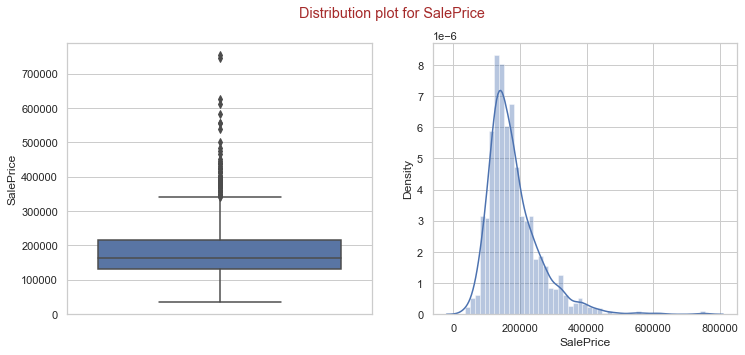

In [240]:
#First Plot the target variable SalePrice
#Increasing the figure size of the plot
plt.figure(figsize=[12,5])
#Checking the values for SalePrice using describe()
print("SalePrice\n", df_house.SalePrice.describe())
#Using Subplots to show different graphs
plt.subplot(1,2,1)
#Create a dist plot for the SalePrice
sns.boxplot(y=df_house.SalePrice)
#Create a historgram
plt.subplot(1,2,2)
sns.distplot(df_house.SalePrice)
plt.suptitle("Distribution plot for SalePrice",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

count   1,451.0000
mean       12.0224
std         0.3995
min        10.4602
25%        11.7745
50%        11.9984
75%        12.2737
max        13.5345
Name: SalePrice, dtype: float64


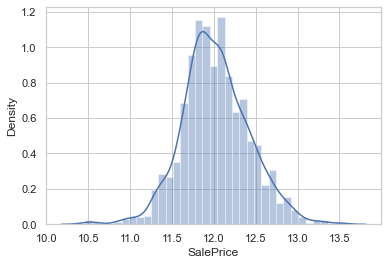

In [241]:
#As the target variable SalePrice is skewed, try applying log transformation for better results
df_house["SalePrice"]=np.log(df_house["SalePrice"])
print(df_house.SalePrice.describe())
sns.distplot(df_house["SalePrice"])
plt.show()

As per the plot, traget variable is normally distributed after applying log transformation.

In [242]:
# all numeric (float and int) variables in the dataset
house_numeric = df_house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0      65.0000     8450    196.0000         706           0        150   
1      80.0000     9600      0.0000         978           0        284   
2      68.0000    11250    162.0000         486           0        434   
3      60.0000     9550      0.0000         216           0        540   
4      84.0000    14260    350.0000         655           0        490   

   TotalBsmtSF  1stFlrSF  LowQualFinSF  GrLivArea  ...  GarageCars  \
0          856       856             0       1710  ...           2   
1         1262      1262             0       1262  ...           2   
2          920       920             0       1786  ...           2   
3          756       961             0       1717  ...           3   
4         1145      1145             0       2198  ...           3   

   GarageArea  WoodDeckSF  PoolArea  MiscVal  SalePrice  HouseAge  RemodelAge  \
0         548           0         0        0    12.2477         5           5   
1         460         298         0        0    12.1090        31          31   
2         608           0         0        0    12.3172         7           6   
3         642           0         0        0    11.8494        91          36   
4         836         192         0        0    12.4292         8           8   

   GarageAge  TotalPorchArea  
0     5.0000              61  
1    31.0000               0  
2     7.0000              42  
3     8.0000             307  
4     8.0000              84  

[5 rows x 28 columns]

In [243]:
# all categorical variables in the dataset
house_category = df_house.select_dtypes(include=['object', 'category'])
house_category.head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave    NA      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave    NA      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave    NA      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave    NA      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave    NA      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood  ... GarageCond PavedDrive PoolQC Fence MiscFeature  \
0       Gtl      CollgCr  ...         TA          Y     NA    NA          NA   
1       Gtl      Veenker  ...         TA          Y     NA    NA          NA   
2       Gtl      CollgCr  ...         TA          Y     NA    NA          NA   
3       Gtl      Crawfor  ...         TA          Y     NA    NA          NA   
4       Gtl      NoRidge  ...         TA          Y     NA    NA          NA   

  MonthSold YearSold SaleType SaleCondition 2ndFlr  
0       Feb     2008       WD        Normal      1  
1       May     2007       WD        Normal      0  
2       Sep     2008       WD        Normal      1  
3       Feb     2006       WD       Abnorml      1  
4       Dec     2008       WD        Normal      1  

[5 rows x 49 columns]

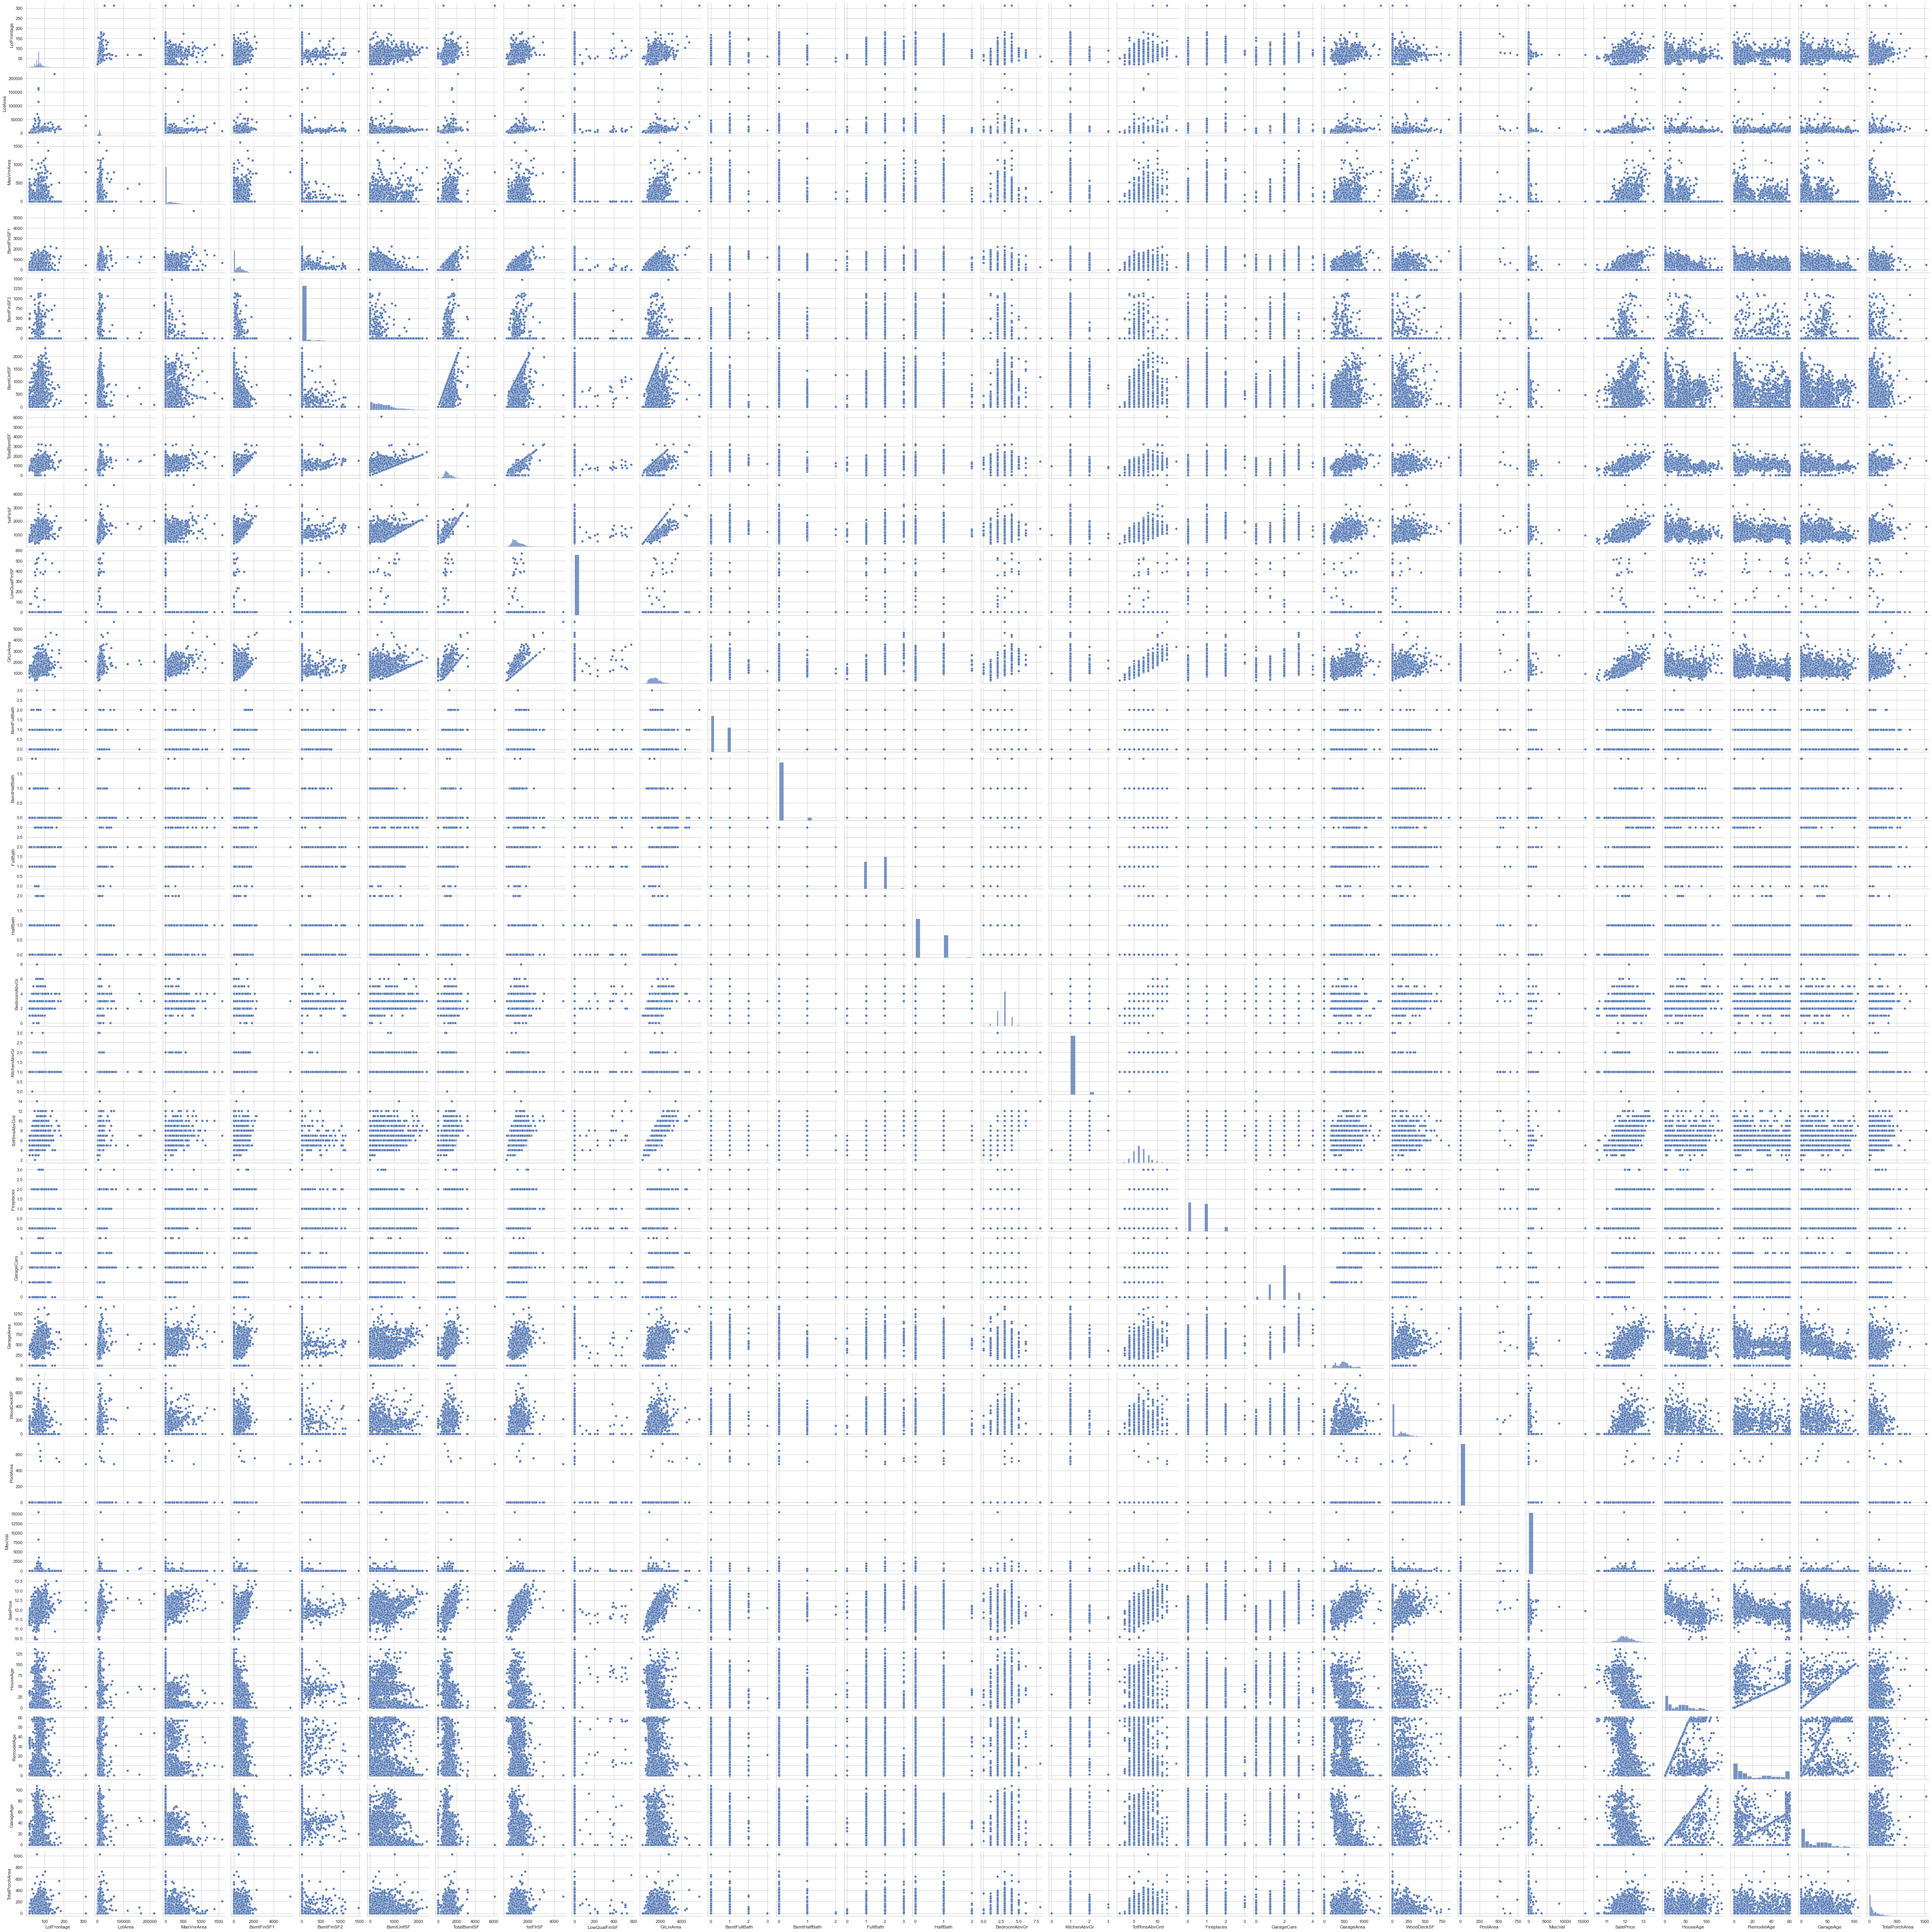

In [244]:
#pairplot for all numerical variables
sns.pairplot(house_numeric)
plt.show()

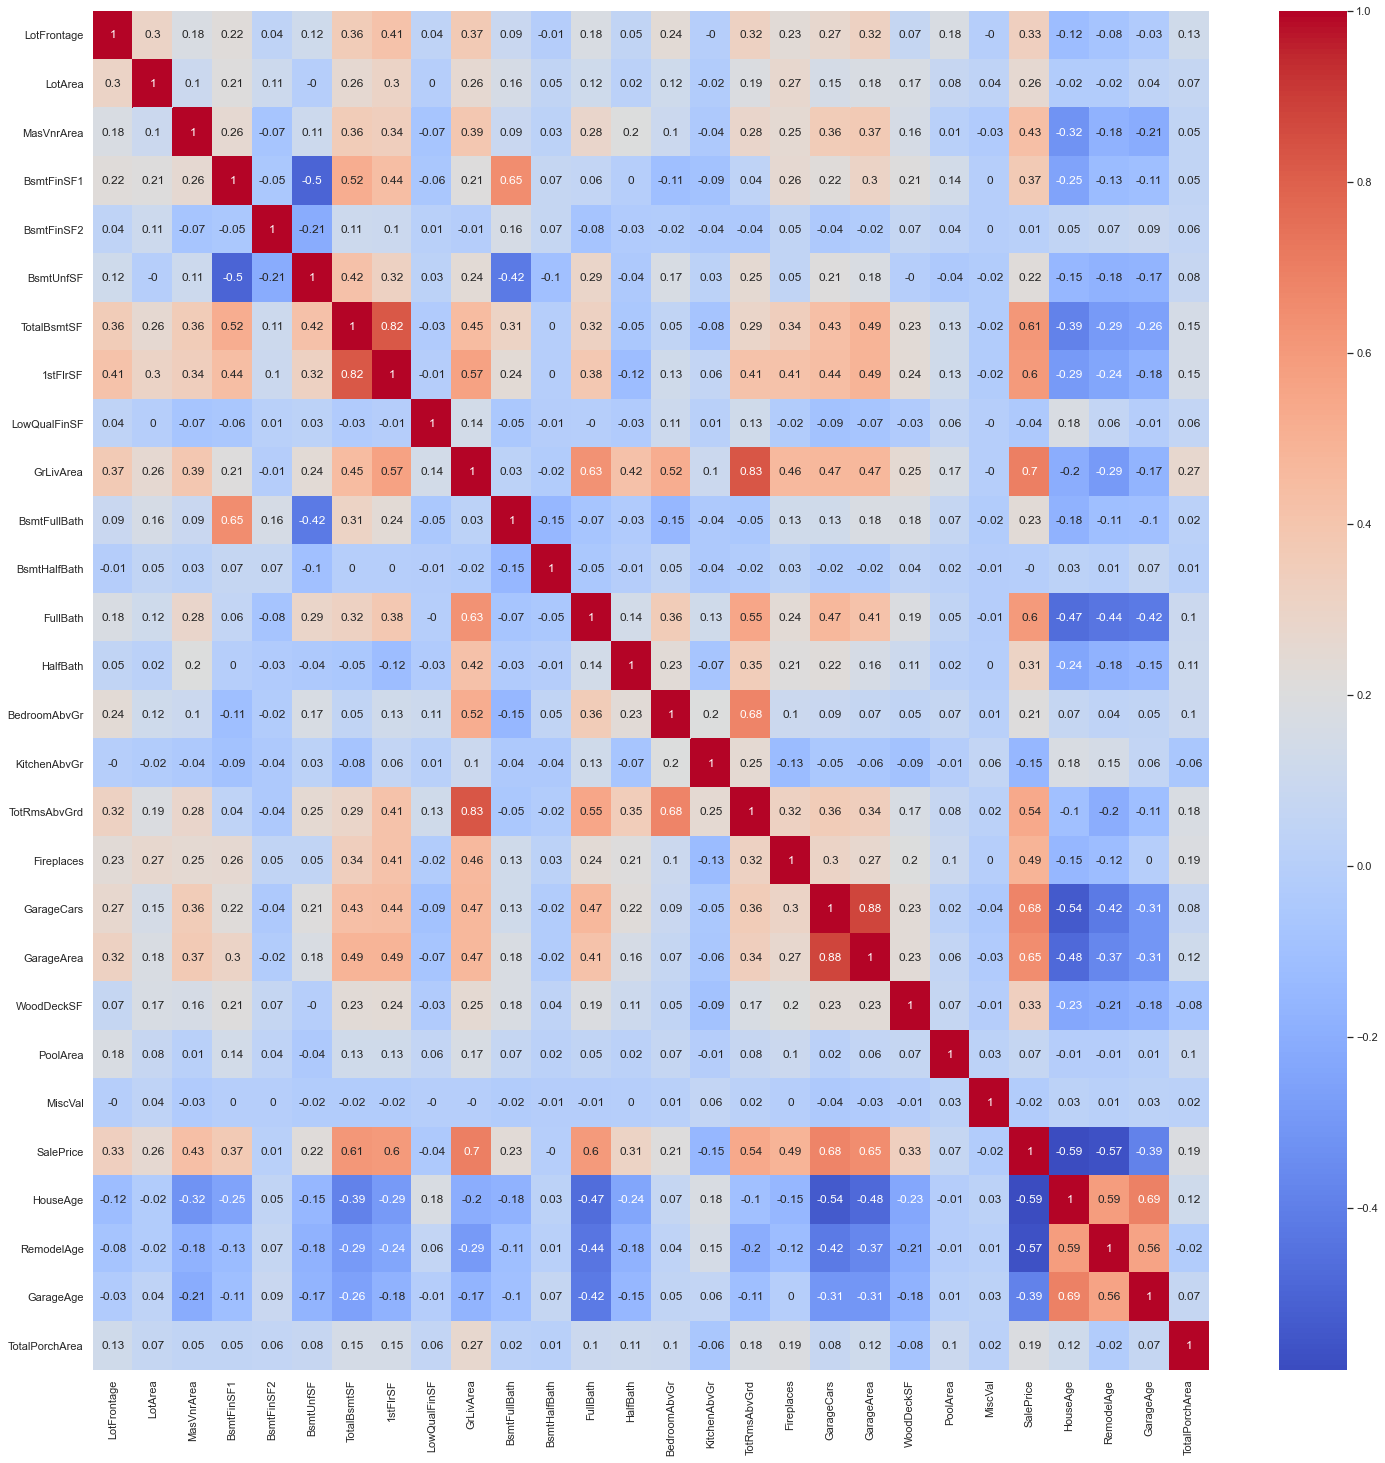

In [245]:
plt.figure(figsize=(25,25))
sns.heatmap(round(house_numeric.corr(),2),annot=True, cmap='coolwarm')
plt.show()

- GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath, TotRmsAbvGrd are highly correlated with SalePrice respectively.
- HouseAge, RemodelAge,GarageAge are negatively correlated with SalePrice.
- GarageCars and GarageArea are correlated with each other
- TotalRmsAbvGrd, BedroomAbvGr are correlated to each other
- GrLivArea,TotRmsAbvGrd are correlated to each other
- TotalBsmtSF,1stFlrSF are correlated to each other

Multicollinearity between different variables is noticed.Will remove few variables which are higly correlated and few others will be taken care using Advanced Regression techniques by adding penalty.


In [246]:
#Drop GarageCars,TotRmsAbvGrd,GarageAge,1stFlrSF
df_house.drop(df_house[["GarageCars","TotRmsAbvGrd","GarageAge"]],axis=1,inplace=True)
df_house.shape

(1451, 74)

In [247]:
#Drop from house_numeric too
house_numeric.drop(house_numeric[["GarageCars","TotRmsAbvGrd","GarageAge"]],axis=1,inplace=True)
house_numeric.shape

(1451, 25)

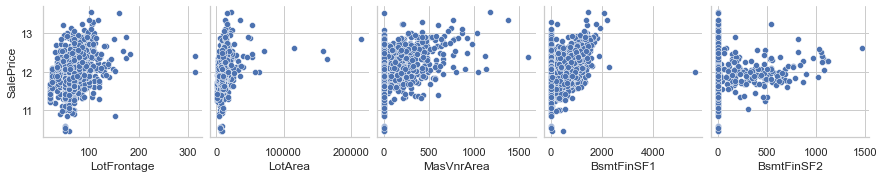

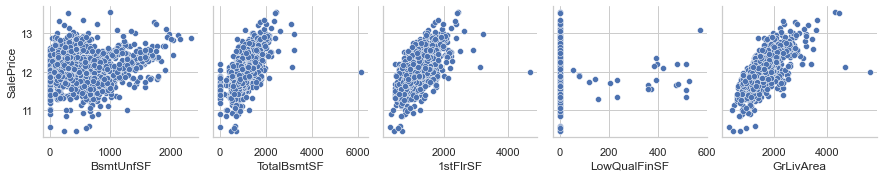

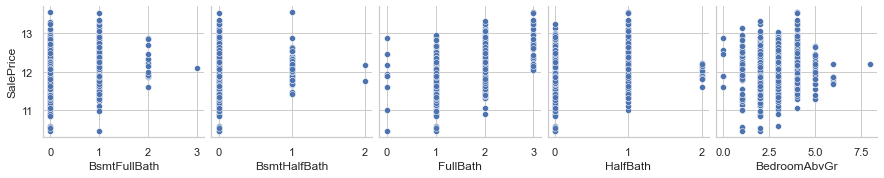

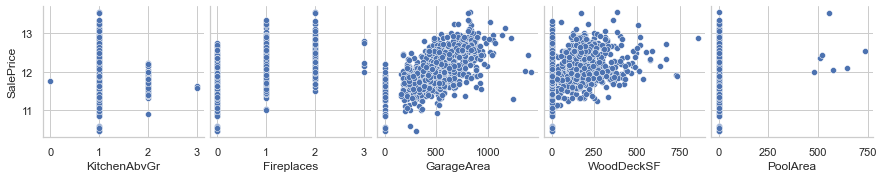

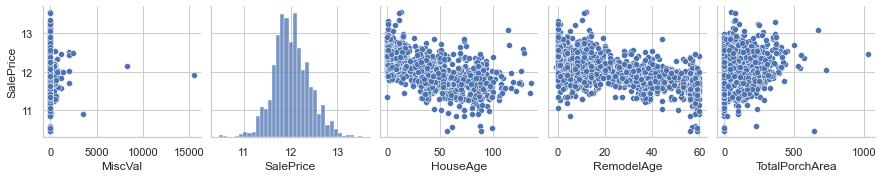

In [248]:
#Since above pairplot and heatmap is not in readable format,plot all the numerical colums w.r.t SalePrice(target variable) for better understanding
for i in range(0, len(house_numeric.columns), 5):
    sns.pairplot(data=house_numeric,
                x_vars=house_numeric.columns[i:i+5],
                y_vars=['SalePrice']);
    plt.show()


In [249]:
house_numeric.describe()

LotFrontage      LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
count   1,451.0000   1,451.0000  1,451.0000  1,451.0000  1,451.0000   
mean       69.8456  10,507.8084    103.7567    442.2750     46.8380   
std        22.0444   9,992.9871    181.1082    455.3693    161.7773   
min        21.0000   1,300.0000      0.0000      0.0000      0.0000   
25%        60.0000   7,537.5000      0.0000      0.0000      0.0000   
50%        69.0000   9,477.0000      0.0000    381.0000      0.0000   
75%        79.0000  11,600.0000    166.0000    707.0000      0.0000   
max       313.0000 215,245.0000  1,600.0000  5,644.0000  1,474.0000   

       BsmtUnfSF  TotalBsmtSF   1stFlrSF  LowQualFinSF  GrLivArea  ...  \
count 1,451.0000   1,451.0000 1,451.0000    1,451.0000 1,451.0000  ...   
mean    567.1971   1,056.3101 1,161.5513        5.8808 1,514.1744  ...   
std     442.2092     437.9146   385.0025       48.7716   525.7995  ...   
min       0.0000       0.0000   334.0000        0.0000   334.0000  ...   
25%     222.0000     795.0000   882.0000        0.0000 1,128.0000  ...   
50%     479.0000     991.0000 1,086.0000        0.0000 1,464.0000  ...   
75%     808.0000   1,297.5000 1,391.0000        0.0000 1,776.0000  ...   
max   2,336.0000   6,110.0000 4,692.0000      572.0000 5,642.0000  ...   

       KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF   PoolArea  \
count    1,451.0000  1,451.0000  1,451.0000  1,451.0000 1,451.0000   
mean         1.0462      0.6127    472.5252     94.4128     2.7760   
std          0.2196      0.6434    214.1718    125.4369    40.3012   
min          0.0000      0.0000      0.0000      0.0000     0.0000   
25%          1.0000      0.0000    327.5000      0.0000     0.0000   
50%          1.0000      1.0000    478.0000      0.0000     0.0000   
75%          1.0000      1.0000    576.0000    168.0000     0.0000   
max          3.0000      3.0000  1,418.0000    857.0000   738.0000   

          MiscVal  SalePrice   HouseAge  RemodelAge  TotalPorchArea  
count  1,451.0000 1,451.0000 1,451.0000  1,451.0000      1,451.0000  
mean      43.7588    12.0224    36.7229     23.0551         86.9600  
std      497.6485     0.3995    30.2388     20.6472        105.2906  
min        0.0000    10.4602     0.0000     -1.0000          0.0000  
25%        0.0000    11.7745     8.0000      4.0000          0.0000  
50%        0.0000    11.9984    35.0000     14.0000         48.0000  
75%        0.0000    12.2737    54.5000     41.0000        136.0000  
max   15,500.0000    13.5345   136.0000     60.0000      1,027.0000  

[8 rows x 25 columns]

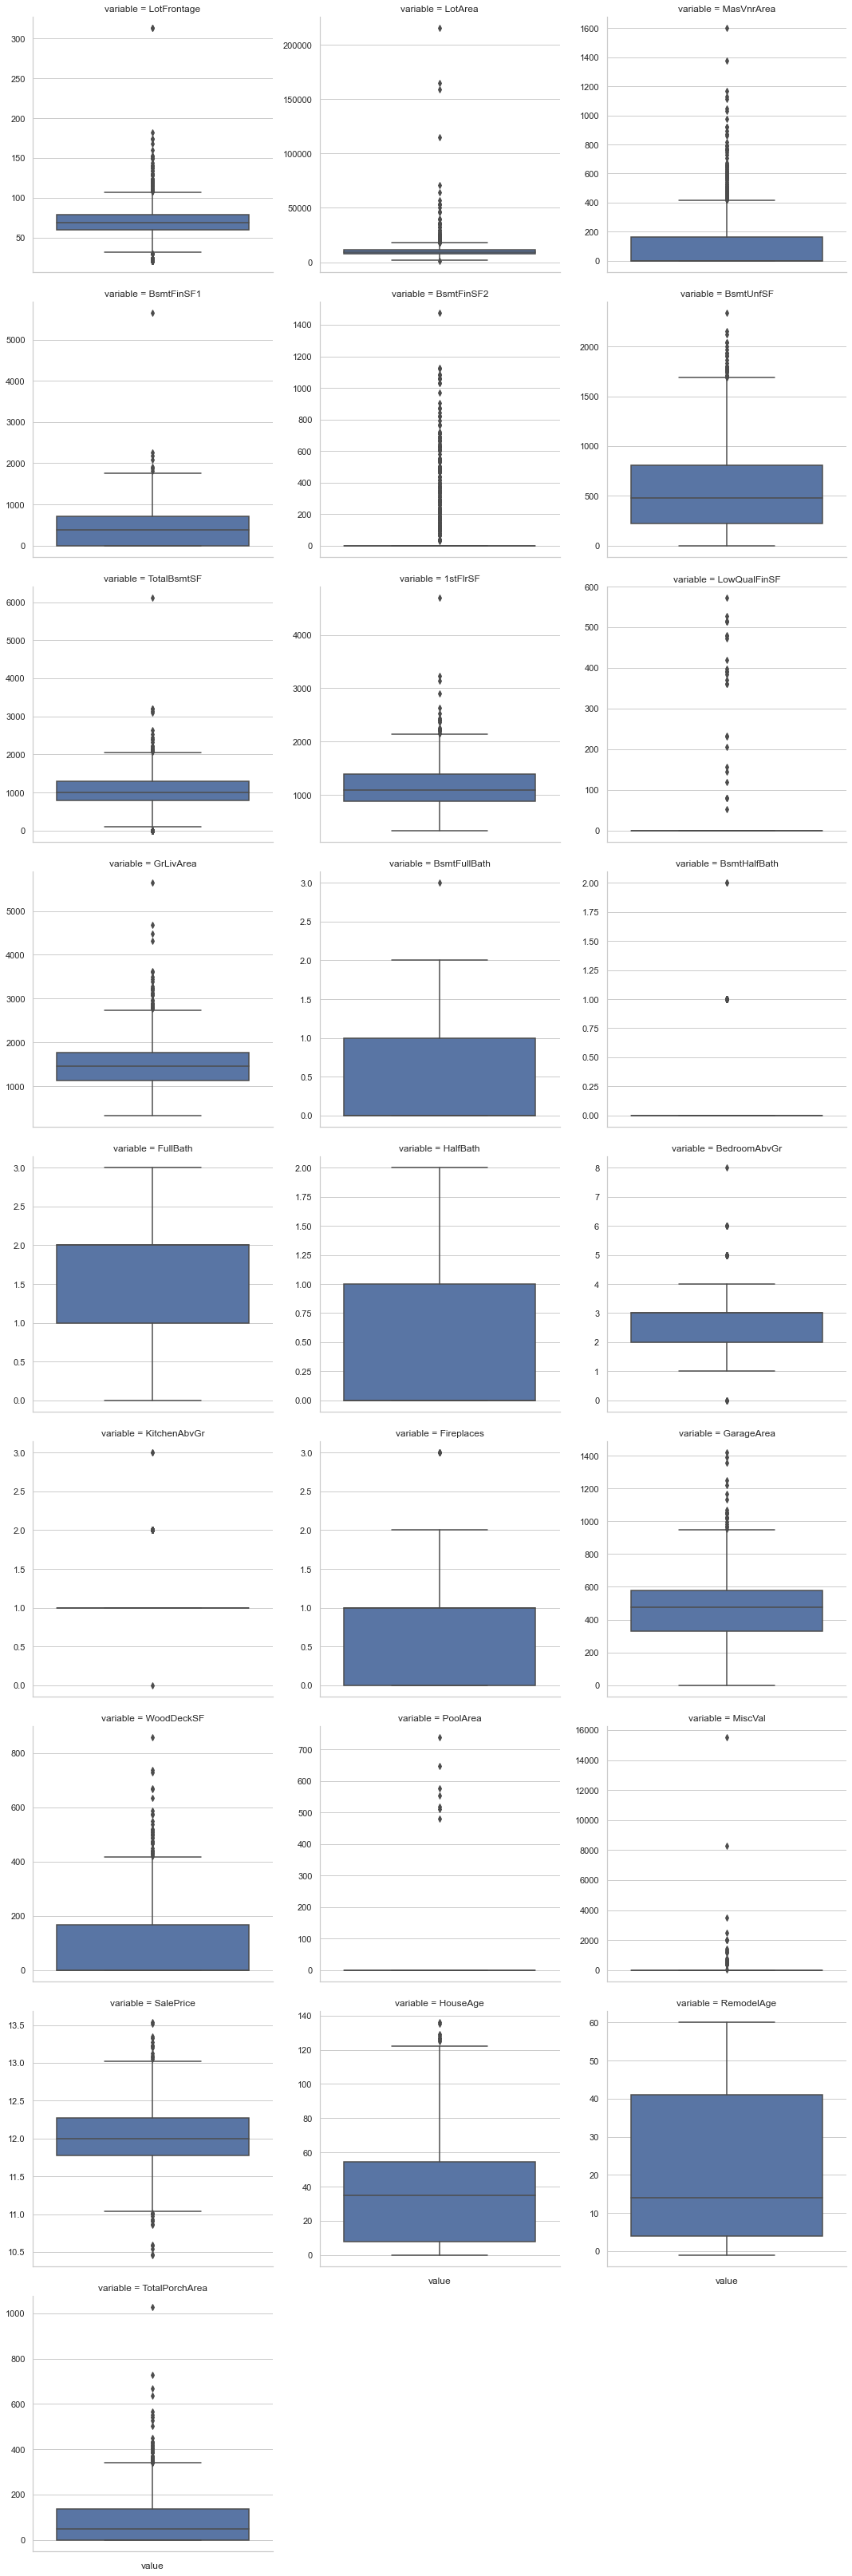

In [250]:
# Plotting boxplots for all Numerical Features with Sale Price
def numeric_boxplot(y, **kwargs):
    sns.boxplot(y=y)
    
numeric_cols = pd.melt(house_numeric)
grid = sns.FacetGrid(numeric_cols,col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
grid = grid.map(numeric_boxplot, "value")

    

From the above pairplots and boxplots, noticed outliers in some features. Will treat them accordingly below.
Observations from the above plots are :

- Age of the house impacts SalePrice i.e; New properties are costlier than older properties.
- GrLivArea has a direct corelation with the price.
- TotalBsmtSF, GarageArea also affects the price of the property.


In [251]:
#Below function is used for handling the outliers considering lower and upper quantiles as 0.25 & 0.99 respectively as we have less data,So cant remove/skip too much of data
#Also checking for the columns which have more effect on SalePrice and the others will be taken care during Sclaing
def drop_outliers(df):
    list = []
    outlier_cols = ['GrLivArea','MasVnrArea','TotalBsmtSF','LotArea']
    for col in outlier_cols:
        Q1 = df[col].quantile(.25)
        Q3 = df[col].quantile(.99)
        IQR = Q3-Q1
        df =  df[(df[col] >= (Q1-(1.5*IQR))) & (df[col] <= (Q3+(1.5*IQR)))] 
    return df  
df_house = drop_outliers(df_house)
df_house.shape


(1446, 74)

In [252]:
df_house.describe()

LotFrontage     LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count   1,446.0000  1,446.0000  1,446.0000  1,446.0000  1,446.0000 1,446.0000   
mean       69.6238 10,047.6411    102.9959    436.8575     46.3313   567.8997   
std        21.0292  5,452.6103    180.0844    433.5612    160.7390   442.5699   
min        21.0000  1,300.0000      0.0000      0.0000      0.0000     0.0000   
25%        60.0000  7,508.7500      0.0000      0.0000      0.0000   223.0000   
50%        69.0000  9,452.5000      0.0000    379.5000      0.0000   480.5000   
75%        79.0000 11,546.2500    164.7500    704.7500      0.0000   808.0000   
max       313.0000 70,761.0000  1,600.0000  2,260.0000  1,474.0000 2,336.0000   

       TotalBsmtSF   1stFlrSF  LowQualFinSF  GrLivArea  ...  KitchenAbvGr  \
count   1,446.0000 1,446.0000    1,446.0000 1,446.0000  ...    1,446.0000   
mean    1,051.0885 1,157.5353        5.9011 1,510.1210  ...        1.0463   
std       416.4689   372.9144       48.8546   514.8137  ...        0.2199   
min         0.0000   334.0000        0.0000   334.0000  ...        0.0000   
25%       794.2500   882.0000        0.0000 1,126.5000  ...        1.0000   
50%       990.0000 1,085.5000        0.0000 1,458.0000  ...        1.0000   
75%     1,290.2500 1,383.0000        0.0000 1,773.2500  ...        1.0000   
max     3,206.0000 3,228.0000      572.0000 4,676.0000  ...        3.0000   

       Fireplaces  GarageArea  WoodDeckSF   PoolArea     MiscVal  SalePrice  \
count  1,446.0000  1,446.0000  1,446.0000 1,446.0000  1,446.0000 1,446.0000   
mean       0.6072    471.6777     93.8651     2.4537     43.0802    12.0209   
std        0.6373    212.9591    124.4210    38.3676    498.0607     0.3990   
min        0.0000      0.0000      0.0000     0.0000      0.0000    10.4602   
25%        0.0000    326.2500      0.0000     0.0000      0.0000    11.7745   
50%        1.0000    478.0000      0.0000     0.0000      0.0000    11.9954   
75%        1.0000    576.0000    168.0000     0.0000      0.0000    12.2714   
max        3.0000  1,390.0000    857.0000   738.0000 15,500.0000    13.5345   

        HouseAge  RemodelAge  TotalPorchArea  
count 1,446.0000  1,446.0000      1,446.0000  
mean     36.7310     23.0705         86.9578  
std      30.2729     20.6464        105.2795  
min       0.0000     -1.0000          0.0000  
25%       8.0000      4.0000          0.0000  
50%      35.0000     14.5000         48.0000  
75%      55.0000     41.0000        136.0000  
max     136.0000     60.0000      1,027.0000  

[8 rows x 25 columns]

In [253]:
# Check all the unique values for categorical variables
house_category.nunique()

MSSubClass       15
MSZoning          5
Street            2
Alley             3
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
OverallQual      10
OverallCond       9
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
PoolQC            4
Fence             5
MiscFeature       5
MonthSold        12
YearSold          5
SaleType          9
SaleCondition     6
2ndFlr            2
dtype: int64

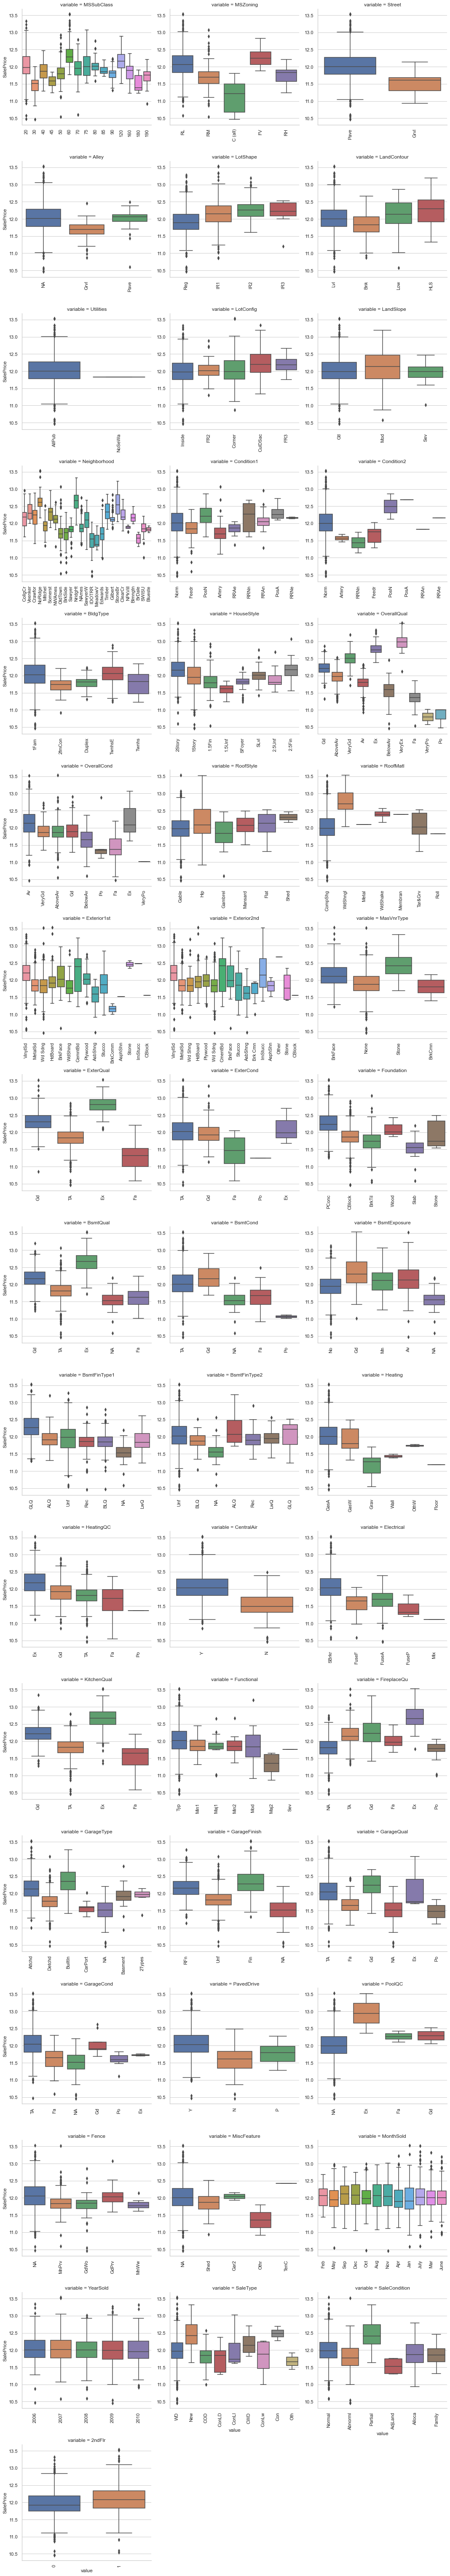

In [254]:
# Plotting Categorical Features with Sale Price
def categorical_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
cat_cols = pd.melt(df_house, id_vars=['SalePrice'], value_vars=house_category.columns)
grid = sns.FacetGrid(cat_cols,col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
grid = grid.map(categorical_boxplot, "value", "SalePrice")

As per above plots,
- OverallQual, OverallCond,KitchenQual, CentralAir, KitchenQual effects the SalePrice
- YearSold, MonthSold doesnt have much impact on SalePrice

In [255]:
#Check the columns which has less number of unique values are per plots seen
print(df_house['Utilities'].value_counts())
print(df_house['Street'].value_counts())
print(df_house['Alley'].value_counts())
print(df_house['RoofMatl'].value_counts())
print(df_house['Condition2'].value_counts())
print(df_house['BsmtHalfBath'].value_counts())
print(df_house['Electrical'].value_counts())

AllPub    1445
NoSeWa       1
Name: Utilities, dtype: int64
Pave    1441
Grvl       5
Name: Street, dtype: int64
NA      1356
Grvl      50
Pave      40
Name: Alley, dtype: int64
CompShg    1421
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64
Norm      1431
Feedr        6
Artery       2
PosN         2
RRNn         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64
0    1365
1      79
2       2
Name: BsmtHalfBath, dtype: int64
SBrkr    1321
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [256]:
#PoolArea and PoolQuality features
print(df_house.PoolArea.describe())
print(df_house.PoolArea.value_counts())
print(df_house['PoolQC'].value_counts())

count   1,446.0000
mean        2.4537
std        38.3676
min         0.0000
25%         0.0000
50%         0.0000
75%         0.0000
max       738.0000
Name: PoolArea, dtype: float64
0      1440
512       1
519       1
555       1
576       1
648       1
738       1
Name: PoolArea, dtype: int64
NA    1440
Ex       2
Fa       2
Gd       2
Name: PoolQC, dtype: int64


In [257]:
#Since most of the houses doesnt has pool,will create a new feature named HasPool to indicate whether it has pool or not and delete PoolArea and PoolQC columns
df_house["Has_Pool"]=df_house["PoolArea"].apply(lambda x:1 if x> 0 else 0).astype('category')

In [258]:
#Most of the houses doesnt have any Miscfeatures.So, dropping MiscFeature and MiscVal columns too
print(house_category.MiscFeature.value_counts())
print(house_numeric.MiscVal.value_counts())

NA      1397
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64
0        1399
400        11
500         8
700         5
450         4
600         4
2000        4
480         2
1200        2
2500        1
350         1
560         1
54          1
620         1
8300        1
800         1
1150        1
15500       1
1300        1
1400        1
3500        1
Name: MiscVal, dtype: int64


In [259]:
#Since most of the values are same,So wont much effect the target variable.Dropping these columns
df_house.drop(df_house[["Utilities","Street","PoolQC","PoolArea","Alley","Electrical","MiscFeature","MiscVal","BsmtHalfBath","Condition2","RoofMatl"]],axis=1,inplace=True)
df_house.shape

(1446, 64)

In [260]:
#Reset the index
df_house.reset_index(inplace=True,drop=True)
df_house.shape

(1446, 64)

In [261]:
#Create a new category and numeric dataframes 
house_category = df_house.select_dtypes(include=['object', 'category'])
house_numeric = df_house.select_dtypes(include=['float64', 'int64'])

Final Dataset used for modeling has 1446 rows and 64 columns. From this will do train and test split, Create dummy variables for categorical columns.

## Dummy Variables

In [262]:
# creating dummy variables for all categorical variables
df_dummy =pd.get_dummies(house_category, drop_first = True)
# Add the results to the original df_house dataframe
df_house = pd.concat([df_house, df_dummy], axis = 1)
#Drop the list of columns for which dummy variables are created
df_house = df_house.drop(list(house_category.columns), axis=1)
# Now let's see the head of our dataframe.
df_house.head()


LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0      65.0000     8450    196.0000         706           0        150   
1      80.0000     9600      0.0000         978           0        284   
2      68.0000    11250    162.0000         486           0        434   
3      60.0000     9550      0.0000         216           0        540   
4      84.0000    14260    350.0000         655           0        490   

   TotalBsmtSF  1stFlrSF  LowQualFinSF  GrLivArea  ...  SaleType_New  \
0          856       856             0       1710  ...             0   
1         1262      1262             0       1262  ...             0   
2          920       920             0       1786  ...             0   
3          756       961             0       1717  ...             0   
4         1145      1145             0       2198  ...             0   

   SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0             0            1                      0                     0   
1             0            1                      0                     0   
2             0            1                      0                     0   
3             0            1                      0                     0   
4             0            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  \
0                     0                     1                      0   
1                     0                     1                      0   
2                     0                     1                      0   
3                     0                     0                      0   
4                     0                     1                      0   

   2ndFlr_1  Has_Pool_1  
0         1           0  
1         0           0  
2         1           0  
3         1           0  
4         1           0  

[5 rows x 264 columns]

### Splitting the Data into Training and Testing Sets

In [263]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_house, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(1012, 264)
(434, 264)


### Rescaling features

In [264]:
from sklearn.preprocessing import MinMaxScaler

# Apply scaling to all the columns except 'dummy' variables
#Using MinMax Scaler as this will take care of outliers and compress the datapoints between 0 and 1
scaler=MinMaxScaler()
df_train[house_numeric.columns]=scaler.fit_transform(df_train[house_numeric.columns])
df_train.head()


LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
405        0.3975   0.1820      0.0625      0.3491      0.0000     0.1049   
45         0.2484   0.1218      0.2575      0.2018      0.0000     0.5548   
1152       0.5466   0.1422      0.0000      0.2177      0.0000     0.1721   
1358       0.3665   0.1590      0.0000      0.3677      0.0000     0.0689   
519        0.6770   0.7431      0.4763      1.0000      0.0000     0.3759   

      TotalBsmtSF  1stFlrSF  LowQualFinSF  GrLivArea  ...  SaleType_New  \
405        0.3225    0.2553        0.0000     0.4017  ...             1   
45         0.5465    0.5057        0.0000     0.3266  ...             0   
1152       0.2789    0.1997        0.0000     0.1290  ...             0   
1358       0.3094    0.4733        0.0000     0.3056  ...             0   
519        0.9788    1.0000        0.0000     1.0000  ...             1   

      SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
405              0            0                      0                     0   
45               0            1                      0                     0   
1152             0            1                      0                     0   
1358             0            1                      0                     0   
519              0            0                      0                     0   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  \
405                      0                     0                      1   
45                       0                     1                      0   
1152                     0                     1                      0   
1358                     0                     1                      0   
519                      0                     0                      1   

      2ndFlr_1  Has_Pool_1  
405          1           0  
45           0           0  
1152         0           0  
1358         0           0  
519          1           0  

[5 rows x 264 columns]

In [265]:
#Apply Scaling on test data
df_test[house_numeric.columns]=scaler.transform(df_test[house_numeric.columns])
df_test.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
811        0.3665   0.1440      0.0500      0.2230      0.0000     0.2166   
30         0.1801   0.1379      0.0000      0.0000      0.0000     0.2778   
432        0.1180   0.0594      0.0000      0.0000      0.0000     0.2774   
1025       0.2981   0.1954      0.0000      0.0000      0.0000     0.0000   
869        0.4534   0.4595      0.0000      0.2801      0.0000     0.1845   

      TotalBsmtSF  1stFlrSF  LowQualFinSF  GrLivArea  ...  SaleType_New  \
811        0.3150    0.2561        0.0000     0.1654  ...             0   
30         0.2024    0.1123        0.0000     0.2264  ...             0   
432        0.2021    0.1427        0.0000     0.1806  ...             0   
1025       0.0000    0.1822        0.0000     0.1177  ...             0   
869        0.3319    0.2518        0.0000     0.1626  ...             0   

      SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
811              0            1                      0                     0   
30               0            1                      0                     0   
432              0            1                      0                     0   
1025             0            1                      0                     0   
869              0            1                      0                     0   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  \
811                      0                     1                      0   
30                       0                     1                      0   
432                      0                     1                      0   
1025                     0                     1                      0   
869                      0                     1                      0   

      2ndFlr_1  Has_Pool_1  
811          0           0  
30           1           0  
432          1           0  
1025         0           0  
869          0           0  

[5 rows x 264 columns]

### Dividing into X and Y sets for the model building

In [266]:
y_train = df_train.pop('SalePrice')
X_train = df_train
print(X_train.shape)
print(y_train.shape)

(1012, 263)
(1012,)


In [267]:
y_test = df_test.pop('SalePrice')
X_test = df_test
print(X_test.shape)
print(y_test.shape)

(434, 263)
(434,)


### Building Models

In [268]:
#First build base Linear Regression model with all the features

lm=LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [269]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

0.1770859742392712
[ 1.09948613e-02  3.96158469e-02 -6.50112471e-03 -3.96650262e+11
 -2.58700215e+11 -4.09988944e+11  5.62681744e+11  5.09997181e-02
 -5.09223005e-02  3.13648224e-01  2.78472900e-02  1.85585022e-02
  1.39160156e-02  1.59072876e-02 -8.80236626e-02  1.35955811e-02
  7.86399841e-02  2.48870850e-02 -7.52897263e-02 -1.27334595e-02
  5.75103760e-02 -2.71987915e-02  3.89747620e-02 -3.94678116e-02
 -3.45230103e-02 -3.56140137e-02 -2.63805389e-02 -5.13668060e-02
 -4.19616699e-04  1.34878159e-02  9.54511429e+10 -4.02908325e-02
 -9.48791504e-02 -3.31878662e-02  7.01045990e-03  2.06871033e-01
  1.56810760e-01  1.78802490e-01  1.58493042e-01  9.84191895e-03
  6.01196289e-03  4.42981720e-03  2.23112106e-02  1.58834457e-02
  2.11009979e-02  1.55334473e-02 -1.33419037e-02  9.99450684e-04
 -7.47299194e-03  1.23519897e-02 -7.45315552e-02  2.82697678e-02
  4.10461426e-03  2.68402100e-02  3.70545387e-02 -4.11987305e-04
  5.65118790e-02 -2.55508423e-02  2.40516663e-03  2.91252136e-03
 -3.80

In [270]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train_lm = lm.predict(X_train)
y_pred_test_lm = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train_lm)
print("R2 Train:",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_lm)
print("R2 Test:",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_lm))
print("RSS Train:",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_lm))
print("RSS Test:",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = np.sqrt(mean_squared_error(y_train, y_pred_train_lm))
print("RMSE Train:",mse_train_lr)
metric.append(mse_train_lr)

mse_test_lr = np.sqrt(mean_squared_error(y_test, y_pred_test_lm))
print("RMSE Test:",mse_test_lr)
metric.append(mse_test_lr)


R2 Train: 0.9490949050421371
R2 Test: -1.9269716633655622e+17
RSS Train: 1.0428813521742435
RSS Test: 1.642698965437868e+18
RMSE Train: 0.03210163812226179
RMSE Test: 61522521.54854302


#### Building LR using RFE

In [272]:
# Running RFE with the output number of the variables equal to 35
rfe=RFE(lm,35)
rfe=rfe.fit(X_train,y_train)

#Selecting the columns via RFE
X_train.columns[rfe.support_]

Index(['LotArea', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'WoodDeckSF',
       'HouseAge', 'TotalPorchArea', 'MSSubClass_90', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'OverallQual_VeryGd', 'OverallQual_Ex',
       'OverallQual_VeryEx', 'OverallCond_Po', 'OverallCond_Fa',
       'Exterior2nd_CBlock', 'ExterCond_Fa', 'Foundation_Wood', 'Heating_GasA',
       'Heating_GasW', 'Heating_Wall', 'HeatingQC_Po', 'Functional_Sev',
       'GarageQual_NA', 'GarageCond_NA', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_New', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Normal'],
      dtype='object')

In [273]:
# Print the coefficients
#print(rfe.estimator_.coef_)
#help(rfe)

#Displaying the co-efficients of the model
rfe_coeff = pd.DataFrame(np.atleast_2d(rfe.estimator_.coef_),columns=X_train.columns[rfe.support_])
rfe_coeff = rfe_coeff.T
rfe_coeff.rename(columns={0: "RFE Co-Efficient"},inplace=True)
rfe_coeff.sort_values(by=['RFE Co-Efficient'], ascending=False,inplace=True)
rfe_coeff

RFE Co-Efficient
GrLivArea                        0.4869
MSZoning_FV                      0.2049
MSZoning_RL                      0.1888
MSZoning_RM                      0.1691
MSZoning_RH                      0.1639
TotalBsmtSF                      0.1301
OverallQual_Ex                   0.1036
Heating_GasW                     0.0952
Heating_GasA                     0.0943
TotalPorchArea                   0.0907
Heating_Wall                     0.0873
Neighborhood_Crawfor             0.0751
SaleType_New                     0.0679
SaleCondition_Alloca             0.0667
OverallQual_VeryEx               0.0608
OverallQual_VeryGd               0.0585
SaleType_Con                     0.0582
BsmtFinSF1                       0.0571
LotArea                          0.0566
WoodDeckSF                       0.0559
SaleCondition_AdjLand            0.0532
SaleType_ConLD                   0.0494
SaleCondition_Normal             0.0487
GarageQual_NA                   -0.0246
GarageCond_NA                   -0.0246
ExterCond_Fa                    -0.0617
MSSubClass_90                   -0.0666
Exterior2nd_CBlock              -0.0683
HeatingQC_Po                    -0.0751
Neighborhood_MeadowV            -0.0888
Foundation_Wood                 -0.0943
OverallCond_Fa                  -0.1004
OverallCond_Po                  -0.1075
Functional_Sev                  -0.1449
HouseAge                        -0.1672

In [274]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train_rfe = rfe.predict(X_train)
y_pred_test_rfe = rfe.predict(X_test)

rmetric = []
r2_train_rfe = r2_score(y_train, y_pred_train_rfe)
print("R2 Train:",r2_train_rfe)
rmetric.append(r2_train_rfe)

r2_test_rfe = r2_score(y_test, y_pred_test_rfe)
print("R2 Test:",r2_test_rfe)
rmetric.append(r2_test_rfe)

rss1_rfe = np.sum(np.square(y_train - y_pred_train_rfe))
print("RSS Train:",rss1_rfe)
rmetric.append(rss1_rfe)

rss2_rfe = np.sum(np.square(y_test - y_pred_test_rfe))
print("RSS Test:",rss2_rfe)
rmetric.append(rss2_rfe)

mse_train_rfe = np.sqrt(mean_squared_error(y_train, y_pred_train_rfe))
print("RMSE Train:",mse_train_rfe)
rmetric.append(mse_train_rfe)

mse_test_rfe = np.sqrt(mean_squared_error(y_test, y_pred_test_rfe))
print("RMSE Test:",mse_test_rfe)
rmetric.append(mse_test_rfe)


R2 Train: 0.8851546410266374
R2 Test: 0.8484828139501295
RSS Train: 2.3528113120350205
RSS Test: 1.2916491171202114
RMSE Train: 0.04821734505000217
RMSE Test: 0.054554101948868075


### Ridge Regression

In [275]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [276]:
# results data frame
ridgecv_results = pd.DataFrame(model_cv.cv_results_)
ridgecv_results.head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0         0.0116        0.0024           0.0048          0.0012      0.0001   
1         0.0124        0.0020           0.0050          0.0000      0.0010   
2         0.0092        0.0016           0.0036          0.0008      0.0100   
3         0.0082        0.0004           0.0030          0.0000      0.0500   
4         0.0086        0.0012           0.0040          0.0006      0.1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}            -0.0351            -0.0308            -0.0344   
1   {'alpha': 0.001}            -0.0350            -0.0308            -0.0343   
2    {'alpha': 0.01}            -0.0346            -0.0304            -0.0343   
3    {'alpha': 0.05}            -0.0337            -0.0294            -0.0342   
4     {'alpha': 0.1}            -0.0331            -0.0288            -0.0340   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0            -0.0330  ...          -0.0338          0.0018               23   
1            -0.0329  ...          -0.0338          0.0018               22   
2            -0.0324  ...          -0.0334          0.0018               21   
3            -0.0320  ...          -0.0327          0.0018               20   
4            -0.0321  ...          -0.0323          0.0019               17   

   split0_train_score  split1_train_score  split2_train_score  \
0             -0.0186             -0.0217             -0.0203   
1             -0.0186             -0.0217             -0.0203   
2             -0.0186             -0.0217             -0.0203   
3             -0.0188             -0.0220             -0.0205   
4             -0.0190             -0.0221             -0.0206   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0             -0.0207             -0.0215           -0.0205           0.0011  
1             -0.0207             -0.0215           -0.0205           0.0011  
2             -0.0208             -0.0216           -0.0206           0.0011  
3             -0.0210             -0.0219           -0.0208           0.0012  
4             -0.0212             -0.0221           -0.0210           0.0012  

[5 rows x 21 columns]

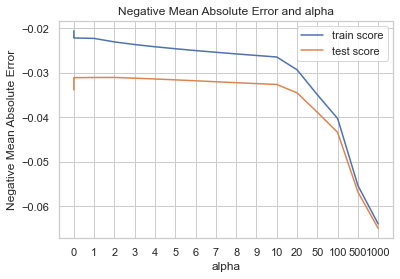

In [277]:
# plotting mean test and train scores with alpha to tune hyper parameter
ridgecv_results['param_alpha'] = ridgecv_results['param_alpha'].astype('int32')
# plotting
plt.plot((ridgecv_results['param_alpha']).astype('str'), ridgecv_results['mean_train_score'])
plt.plot((ridgecv_results['param_alpha']).astype('str'), ridgecv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'])
plt.show()

In [278]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [279]:
#Fitting Ridge model for alpha and printing coefficients which have been penalised
rr_alpha=model_cv.best_params_["alpha"]
print(rr_alpha)
ridge = Ridge(alpha=rr_alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

2.0
[ 1.24708488e-02  4.03673937e-02  3.97181328e-03  3.86603460e-02
  1.96498073e-02  1.92335719e-02  5.03012545e-02  1.08853748e-01
  2.82079415e-03  1.30388046e-01  3.08018287e-02  3.96295581e-02
  2.70976470e-02  3.84756495e-02 -3.44198515e-02  1.97617888e-02
  6.94032711e-02  2.61493495e-02 -4.31638551e-02 -1.63250011e-02
  5.13799460e-02 -2.34310921e-02  1.29925578e-02 -8.56897772e-03
 -1.27612002e-02 -5.30555546e-03  1.73780897e-03  1.96320719e-02
 -3.89879615e-03  7.11284031e-03 -1.15070743e-03 -7.49387975e-03
 -3.52799009e-02 -7.93564239e-03 -1.54333596e-03  6.65810563e-02
  3.71203007e-02  4.97940725e-02  3.86415824e-02  1.42927537e-02
  4.64532872e-03  2.63979877e-03  1.63979380e-02  5.15167832e-05
  1.63150428e-02  1.54608054e-02 -1.58795090e-02 -8.34532219e-04
 -6.80390044e-03  9.92449927e-03 -4.06905057e-02  2.79054692e-03
 -7.11840184e-03  4.67203071e-03  2.51616563e-02 -5.07822529e-03
  4.45107565e-02 -2.52477214e-02 -8.80373855e-03 -3.08533205e-02
 -3.97881645e-02 -1.4

In [280]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

metric2 = []
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
print("R2 Train:",r2_train_ridge)
metric2.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
print("R2 Test:",r2_test_ridge)
metric2.append(r2_test_ridge)

rss1_ridge = np.sum(np.square(y_train - y_pred_train_ridge))
print("RSS Train:",rss1_ridge)
metric2.append(rss1_ridge)

rss2_ridge = np.sum(np.square(y_test - y_pred_test_ridge))
print("RSS Test:",rss2_ridge)
metric2.append(rss2_ridge)

mse_train_ridge = np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))
print("RMSE Train:",mse_train_ridge)
metric2.append(mse_train_ridge)

mse_test_ridge = np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))
print("RMSE Test:",mse_test_ridge)
metric2.append(mse_test_ridge)

R2 Train: 0.9409625211992297
R2 Test: 0.8874992866914636
RSS Train: 1.2094876902139127
RSS Test: 0.9590426723773569
RMSE Train: 0.034570882819889834
RMSE Test: 0.047008251858636156


### Ridge with RFE features

In [281]:
cols=X_train.columns[rfe.support_]
X_train_rfe = X_train[cols]
X_test_rfe=X_test[cols]

In [282]:
X_train_rfe.head()

LotArea  BsmtFinSF1  TotalBsmtSF  GrLivArea  WoodDeckSF  HouseAge  \
405    0.1820      0.3491       0.3225     0.4017      0.0000    0.0078   
45     0.1218      0.2018       0.5465     0.3266      0.2287    0.0391   
1152   0.1422      0.2177       0.2789     0.1290      0.0000    0.3047   
1358   0.1590      0.3677       0.3094     0.3056      0.0000    0.4141   
519    0.7431      1.0000       0.9788     1.0000      0.2427    0.0000   

      TotalPorchArea  MSSubClass_90  MSZoning_FV  MSZoning_RH  ...  \
405           0.0993              0            1            0  ...   
45            0.0798              0            0            0  ...   
1152          0.0000              0            0            0  ...   
1358          0.2006              0            0            0  ...   
519           0.3953              0            0            0  ...   

      HeatingQC_Po  Functional_Sev  GarageQual_NA  GarageCond_NA  \
405              0               0              0              0   
45               0               0              0              0   
1152             0               0              0              0   
1358             0               0              0              0   
519              0               0              0              0   

      SaleType_Con  SaleType_ConLD  SaleType_New  SaleCondition_AdjLand  \
405              0               0             1                      0   
45               0               0             0                      0   
1152             0               0             0                      0   
1358             0               0             0                      0   
519              0               0             1                      0   

      SaleCondition_Alloca  SaleCondition_Normal  
405                      0                     0  
45                       0                     1  
1152                     0                     1  
1358                     0                     1  
519                      0                     0  

[5 rows x 35 columns]

In [283]:
#Building Ridge model with only features selected by RFE
ridge_Rfe=Ridge()
model_RidgeRfe_cv = GridSearchCV(estimator = ridge_Rfe, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_RidgeRfe_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [284]:
# Printing the best hyperparameter alpha
print(model_RidgeRfe_cv.best_params_)

{'alpha': 0.2}


In [285]:
#Fitting Ridge model for alpha and printing coefficients which have been penalised
RidgeRfe_alpha=model_RidgeRfe_cv.best_params_["alpha"]
print(RidgeRfe_alpha)
RidgeRfe = Ridge(alpha=RidgeRfe_alpha)

RidgeRfe.fit(X_train_rfe, y_train)
print(RidgeRfe.coef_)

0.2
[ 0.05792305  0.05706979  0.13002903  0.47850093  0.05700088 -0.16739542
  0.09038838 -0.06403146  0.17749091  0.13422065  0.16192465  0.14179576
  0.07538562 -0.0873087   0.0593864   0.1037922   0.06203441 -0.09916667
 -0.10062351 -0.05669138 -0.06047706 -0.08608904  0.08810512  0.08582156
  0.07089318 -0.06296344 -0.11858768 -0.02538174 -0.02538174  0.05297412
  0.04325565  0.06886501  0.04826473  0.0645617   0.04942761]


In [286]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train_ridgerfe = RidgeRfe.predict(X_train_rfe)
y_pred_test_ridgerfe = RidgeRfe.predict(X_test_rfe)

metric_RidgeRfe = []
r2_train_ridgerfe = r2_score(y_train, y_pred_train_ridgerfe)
print("R2 Train:",r2_train_ridgerfe)
metric_RidgeRfe.append(r2_train_ridgerfe)

r2_test_ridgerfe = r2_score(y_test, y_pred_test_ridgerfe)
print("R2 Test:",r2_test_ridgerfe)
metric_RidgeRfe.append(r2_test_ridgerfe)

rss1_ridgerfe = np.sum(np.square(y_train - y_pred_train_ridgerfe))
print("RSS Train:",rss1_ridgerfe)
metric_RidgeRfe.append(rss1_ridgerfe)

rss2_ridgerfe = np.sum(np.square(y_test - y_pred_test_ridgerfe))
print("RSS Test:",rss2_ridgerfe)
metric_RidgeRfe.append(rss2_ridgerfe)

mse_train_ridgerfe = np.sqrt(mean_squared_error(y_train, y_pred_train_ridgerfe))
print("RMSE Train:",mse_train_ridgerfe)
metric_RidgeRfe.append(mse_train_ridgerfe)

mse_test_ridgerfe = np.sqrt(mean_squared_error(y_test, y_pred_test_ridgerfe))
print("RMSE Test:",mse_test_ridgerfe)
metric_RidgeRfe.append(mse_test_ridgerfe)

R2 Train: 0.8848570407834713
R2 Test: 0.8503049146683408
RSS Train: 2.3589081819899316
RSS Test: 1.276116128121807
RMSE Train: 0.04827977774105043
RMSE Test: 0.054225084068317914


### Lasso

In [287]:
lasso = Lasso()

# cross validation
model_lcv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lcv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [288]:
# results data frame
lassocv_results = pd.DataFrame(model_lcv.cv_results_)
lassocv_results.head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0         0.0385        0.0082           0.0044          0.0005      0.0001   
1         0.0134        0.0030           0.0040          0.0009      0.0010   
2         0.0102        0.0017           0.0036          0.0008      0.0100   
3         0.0078        0.0004           0.0032          0.0004      0.0500   
4         0.0078        0.0004           0.0034          0.0005      0.1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}            -0.0315            -0.0274            -0.0324   
1   {'alpha': 0.001}            -0.0343            -0.0332            -0.0389   
2    {'alpha': 0.01}            -0.0634            -0.0625            -0.0752   
3    {'alpha': 0.05}            -0.1024            -0.1027            -0.1234   
4     {'alpha': 0.1}            -0.1024            -0.1027            -0.1234   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0            -0.0299  ...          -0.0303          0.0017                1   
1            -0.0381  ...          -0.0360          0.0022                2   
2            -0.0730  ...          -0.0692          0.0052                3   
3            -0.1095  ...          -0.1108          0.0080                4   
4            -0.1095  ...          -0.1108          0.0080                4   

   split0_train_score  split1_train_score  split2_train_score  \
0             -0.0216             -0.0241             -0.0233   
1             -0.0320             -0.0334             -0.0321   
2             -0.0692             -0.0689             -0.0681   
3             -0.1127             -0.1126             -0.1076   
4             -0.1127             -0.1126             -0.1076   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0             -0.0231             -0.0240           -0.0232           0.0009  
1             -0.0328             -0.0340           -0.0329           0.0008  
2             -0.0685             -0.0679           -0.0685           0.0005  
3             -0.1111             -0.1093           -0.1107           0.0020  
4             -0.1111             -0.1093           -0.1107           0.0020  

[5 rows x 21 columns]

In [289]:
# Printing the best hyperparameter alpha
print(model_lcv.best_params_)

{'alpha': 0.0001}


In [290]:
#Fitting Lasso model for best alpha  and printing coefficients which have been penalised
ls_alpha=model_lcv.best_params_["alpha"]
print(ls_alpha)
lasso = Lasso(alpha=ls_alpha)
        
lasso.fit(X_train, y_train)
lasso.coef_

0.0001


array([ 0.00000000e+00,  3.38190422e-02, -0.00000000e+00,  2.20683891e-02,
        0.00000000e+00, -0.00000000e+00,  5.67688758e-02,  4.92687067e-02,
       -0.00000000e+00,  3.23914265e-01,  3.07947486e-02,  1.92511185e-02,
        1.51921392e-02,  1.93703820e-02, -3.58466691e-02,  1.19759785e-02,
        7.16986777e-02,  2.34722033e-02, -6.36875202e-02, -1.58818422e-02,
        4.70715059e-02, -2.46763889e-02,  0.00000000e+00,  0.00000000e+00,
       -4.23981222e-03, -2.72652968e-03,  0.00000000e+00,  7.49488156e-03,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -1.93225961e-02, -0.00000000e+00,  0.00000000e+00,  6.02921679e-02,
        2.33428710e-02,  4.33181934e-02,  2.52758318e-02,  1.35581991e-02,
        0.00000000e+00,  3.39998018e-03,  1.05031088e-02,  0.00000000e+00,
        1.48410928e-02,  1.35037066e-02, -5.78251591e-03,  0.00000000e+00,
       -5.60858606e-03,  5.53227998e-03, -2.40112358e-02,  0.00000000e+00,
       -0.00000000e+00,  

In [291]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

metric3 = []
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
print("R2 Train:",r2_train_lasso)
metric3.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test_lasso)
print("R2 Test:",r2_test_lasso)
metric3.append(r2_test_lasso)

rss1_lasso = np.sum(np.square(y_train - y_pred_train_lasso))
print("RSS Train:",rss1_lasso)
metric3.append(rss1_lasso)

rss2_lasso = np.sum(np.square(y_test - y_pred_test_lasso))
print("RSS Test:",rss2_lasso)
metric3.append(rss2_lasso)

mse_train_lasso = np.sqrt(mean_squared_error(y_train, y_pred_train_lasso))
print("RMSE Train:",mse_train_lasso)
metric3.append(mse_train_lasso)

mse_test_lasso = np.sqrt(mean_squared_error(y_test, y_pred_test_lasso))
print("RMSE Test:",mse_test_lasso)
metric3.append(mse_test_lasso)

R2 Train: 0.9370583186584055
R2 Test: 0.8965178503712791
RSS Train: 1.2894722188412968
RSS Test: 0.8821614939551812
RMSE Train: 0.035695686496104245
RMSE Test: 0.04508469995911743


### Lasso with RFE features

In [292]:
# Build Lasso Model with RFE features
lasso_Rfe=Lasso()
lassoRfe_lcv = GridSearchCV(estimator = lasso_Rfe, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lassoRfe_lcv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [293]:
# Printing the best hyperparameter alpha
print(lassoRfe_lcv.best_params_)

{'alpha': 0.0001}


In [294]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised
lassoRfe_alpha=lassoRfe_lcv.best_params_["alpha"]
print(lassoRfe_alpha)
lassoRfe = Lasso(alpha=lassoRfe_alpha)
        
lassoRfe.fit(X_train_rfe, y_train)
lassoRfe.coef_

0.0001


array([ 4.52099541e-02,  5.84190635e-02,  1.27891029e-01,  4.95542442e-01,
        5.34651637e-02, -1.68106735e-01,  7.78302919e-02, -5.48965460e-02,
        1.09533172e-01,  5.79096250e-02,  9.51833427e-02,  7.30552278e-02,
        7.20344284e-02, -8.01584280e-02,  5.82324824e-02,  1.00847492e-01,
        5.34693231e-02, -6.85722337e-02, -9.97310828e-02, -0.00000000e+00,
       -5.40107994e-02, -4.21052107e-02,  5.75591135e-02,  4.12231225e-02,
        0.00000000e+00, -0.00000000e+00, -4.25719367e-02, -5.29384861e-02,
       -2.26717406e-15,  7.41119686e-03,  1.39756616e-02,  6.68062258e-02,
        0.00000000e+00,  4.37363744e-02,  4.76126734e-02])

In [295]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train_lassorfe = lassoRfe.predict(X_train_rfe)
y_pred_test_lassorfe = lassoRfe.predict(X_test_rfe)

metric_lassoRfe = []
r2_train_lassorfe = r2_score(y_train, y_pred_train_lassorfe)
print("R2 Train:",r2_train_lassorfe)
metric_lassoRfe.append(r2_train_lassorfe)

r2_test_lassorfe = r2_score(y_test, y_pred_test_lassorfe)
print("R2 Test:",r2_test_lassorfe)
metric_lassoRfe.append(r2_test_lassorfe)

rss1_lassorfe = np.sum(np.square(y_train - y_pred_train_lassorfe))
print("RSS Train:",rss1_lassorfe)
metric_lassoRfe.append(rss1_lassorfe)

rss2_lassorfe = np.sum(np.square(y_test - y_pred_test_lassorfe))
print("RSS Test:",rss2_lassorfe)
metric_lassoRfe.append(rss2_lassorfe)

mse_train_lassorfe = np.sqrt(mean_squared_error(y_train, y_pred_train_lassorfe))
print("RMSE Train:",mse_train_lassorfe)
metric_lassoRfe.append(mse_train_lassorfe)

mse_test_lassorfe = np.sqrt(mean_squared_error(y_test, y_pred_test_lassorfe))
print("RMSE Test:",mse_test_lassorfe)
metric_lassoRfe.append(mse_test_lassorfe)

R2 Train: 0.8799375240888663
R2 Test: 0.8527912835285311
RSS Train: 2.4596932257416464
RSS Test: 1.254920406192
RMSE Train: 0.049300374267410636
RMSE Test: 0.05377287116430976


In [296]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rf_metric = pd.Series(rmetric, name = 'Linear Regression(RFE)')
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
RidgeRfe_metric = pd.Series(metric_RidgeRfe, name = 'Ridge with RFE')
LassoRfe_metric = pd.Series(metric_lassoRfe, name = 'Lasso with RFE')

final_metric = pd.concat([lr_metric, rf_metric, rg_metric, ls_metric, RidgeRfe_metric,LassoRfe_metric], axis = 1)

final_metric

Metric              Linear Regression  Linear Regression(RFE)  \
0  R2 Score (Train)                         0.9491                  0.8852   
1   R2 Score (Test)  -192,697,166,336,556,224.0000                  0.8485   
2       RSS (Train)                         1.0429                  2.3528   
3        RSS (Test) 1,642,698,965,437,868,032.0000                  1.2916   
4       MSE (Train)                         0.0321                  0.0482   
5        MSE (Test)                61,522,521.5485                  0.0546   

   Ridge Regression  Lasso Regression  Ridge with RFE  Lasso with RFE  
0            0.9410            0.9371          0.8849          0.8799  
1            0.8875            0.8965          0.8503          0.8528  
2            1.2095            1.2895          2.3589          2.4597  
3            0.9590            0.8822          1.2761          1.2549  
4            0.0346            0.0357          0.0483          0.0493  
5            0.0470            0.0451          0.0542          0.0538

#### Lets observe the changes in the coefficients after regularization

In [297]:
#Coefficients for models with all the variables.
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas

Linear   Ridge   Lasso
LotFrontage                          0.0110  0.0125  0.0000
LotArea                              0.0396  0.0404  0.0338
MasVnrArea                          -0.0065  0.0040 -0.0000
BsmtFinSF1            -396,650,262,489.9311  0.0387  0.0221
BsmtFinSF2            -258,700,215,446.9848  0.0196  0.0000
BsmtUnfSF             -409,988,943,883.4252  0.0192 -0.0000
TotalBsmtSF            562,681,744,045.5433  0.0503  0.0568
1stFlrSF                             0.0510  0.1089  0.0493
LowQualFinSF                        -0.0509  0.0028 -0.0000
GrLivArea                            0.3136  0.1304  0.3239
BsmtFullBath                         0.0278  0.0308  0.0308
FullBath                             0.0186  0.0396  0.0193
HalfBath                             0.0139  0.0271  0.0152
BedroomAbvGr                         0.0159  0.0385  0.0194
KitchenAbvGr                        -0.0880 -0.0344 -0.0358
Fireplaces                           0.0136  0.0198  0.0120
GarageArea                           0.0786  0.0694  0.0717
WoodDeckSF                           0.0249  0.0261  0.0235
HouseAge                            -0.0753 -0.0432 -0.0637
RemodelAge                          -0.0127 -0.0163 -0.0159
TotalPorchArea                       0.0575  0.0514  0.0471
MSSubClass_30                       -0.0272 -0.0234 -0.0247
MSSubClass_40                        0.0390  0.0130  0.0000
MSSubClass_45                       -0.0395 -0.0086  0.0000
MSSubClass_50                       -0.0345 -0.0128 -0.0042
MSSubClass_60                       -0.0356 -0.0053 -0.0027
MSSubClass_70                       -0.0264  0.0017  0.0000
MSSubClass_75                       -0.0514  0.0196  0.0075
MSSubClass_80                       -0.0004 -0.0039  0.0000
MSSubClass_85                        0.0135  0.0071  0.0000
MSSubClass_90           95,451,142,863.1859 -0.0012 -0.0000
MSSubClass_120                      -0.0403 -0.0075 -0.0000
MSSubClass_160                      -0.0949 -0.0353 -0.0193
MSSubClass_180                      -0.0332 -0.0079 -0.0000
MSSubClass_190                       0.0070 -0.0015  0.0000
MSZoning_FV                          0.2069  0.0666  0.0603
MSZoning_RH                          0.1568  0.0371  0.0233
MSZoning_RL                          0.1788  0.0498  0.0433
MSZoning_RM                          0.1585  0.0386  0.0253
LotShape_IR2                         0.0098  0.0143  0.0136
LotShape_IR3                         0.0060  0.0046  0.0000
LotShape_Reg                         0.0044  0.0026  0.0034
LandContour_HLS                      0.0223  0.0164  0.0105
LandContour_Low                      0.0159  0.0001  0.0000
LandContour_Lvl                      0.0211  0.0163  0.0148
LotConfig_CulDSac                    0.0155  0.0155  0.0135
LotConfig_FR2                       -0.0133 -0.0159 -0.0058
LotConfig_FR3                        0.0010 -0.0008  0.0000
LotConfig_Inside                    -0.0075 -0.0068 -0.0056
LandSlope_Mod                        0.0124  0.0099  0.0055
LandSlope_Sev                       -0.0745 -0.0407 -0.0240
Neighborhood_Blueste                 0.0283  0.0028  0.0000
Neighborhood_BrDale                  0.0041 -0.0071 -0.0000
Neighborhood_BrkSide                 0.0268  0.0047  0.0112
Neighborhood_ClearCr                 0.0371  0.0252  0.0241
Neighborhood_CollgCr                -0.0004 -0.0051 -0.0001
Neighborhood_Crawfor                 0.0565  0.0445  0.0486
Neighborhood_Edwards                -0.0256 -0.0252 -0.0178
Neighborhood_Gilbert                 0.0024 -0.0088 -0.0000
Neighborhood_IDOTRR                  0.0029 -0.0309 -0.0199
Neighborhood_MeadowV                -0.0380 -0.0398 -0.0388
Neighborhood_Mitchel                -0.0142 -0.0140 -0.0068
Neighborhood_NAmes                  -0.0071 -0.0119 -0.0077
Neighborhood_NPkVill                 0.0208  0.0119  0.0000
Neighborhood_NWAmes                 -0.0093 -0.0145 -0.0082
Neighborhood_NoRidge                 0.0309  0.0271  0.0158
Neighborhood_Nrid

In [298]:
#Coefficients from all the models for the features selected by RFE
betas_rfe = pd.DataFrame(index=X_train_rfe.columns)
betas_rfe.rows = X_train_rfe.columns
betas_rfe['RFE'] = rfe.estimator_.coef_
betas_rfe['Ridge'] = RidgeRfe.coef_
betas_rfe['Lasso'] = lassoRfe.coef_
betas_rfe

RFE   Ridge   Lasso
LotArea                0.0566  0.0579  0.0452
BsmtFinSF1             0.0571  0.0571  0.0584
TotalBsmtSF            0.1301  0.1300  0.1279
GrLivArea              0.4869  0.4785  0.4955
WoodDeckSF             0.0559  0.0570  0.0535
HouseAge              -0.1672 -0.1674 -0.1681
TotalPorchArea         0.0907  0.0904  0.0778
MSSubClass_90         -0.0666 -0.0640 -0.0549
MSZoning_FV            0.2049  0.1775  0.1095
MSZoning_RH            0.1639  0.1342  0.0579
MSZoning_RL            0.1888  0.1619  0.0952
MSZoning_RM            0.1691  0.1418  0.0731
Neighborhood_Crawfor   0.0751  0.0754  0.0720
Neighborhood_MeadowV  -0.0888 -0.0873 -0.0802
OverallQual_VeryGd     0.0585  0.0594  0.0582
OverallQual_Ex         0.1036  0.1038  0.1008
OverallQual_VeryEx     0.0608  0.0620  0.0535
OverallCond_Po        -0.1075 -0.0992 -0.0686
OverallCond_Fa        -0.1004 -0.1006 -0.0997
Exterior2nd_CBlock    -0.0683 -0.0567 -0.0000
ExterCond_Fa          -0.0617 -0.0605 -0.0540
Foundation_Wood       -0.0943 -0.0861 -0.0421
Heating_GasA           0.0943  0.0881  0.0576
Heating_GasW           0.0952  0.0858  0.0412
Heating_Wall           0.0873  0.0709  0.0000
HeatingQC_Po          -0.0751 -0.0630 -0.0000
Functional_Sev        -0.1449 -0.1186 -0.0426
GarageQual_NA         -0.0246 -0.0254 -0.0529
GarageCond_NA         -0.0246 -0.0254 -0.0000
SaleType_Con           0.0582  0.0530  0.0074
SaleType_ConLD         0.0494  0.0433  0.0140
SaleType_New           0.0679  0.0689  0.0668
SaleCondition_AdjLand  0.0532  0.0483  0.0000
SaleCondition_Alloca   0.0667  0.0646  0.0437
SaleCondition_Normal   0.0487  0.0494  0.0476

In [299]:
importance = np.abs(betas['Lasso'])
print("Number of variables whose coefficients is non zero in Lasso : ",len(np.array(X_train.columns)[importance > 0]))

Number of variables whose coefficients is non zero in Lasso :  158


In [300]:
importance_lassoRfe = np.abs(betas_rfe['Lasso']) 
print("Number of variables whose coefficients is non zero in Lasso RFE : ",len(np.array(X_train_rfe.columns)[importance_lassoRfe > 0]))

Number of variables whose coefficients is non zero in Lasso RFE :  31


In [301]:
#Displaying the Ridge co-efficients of the model
ridge_coeff = pd.DataFrame(np.atleast_2d(ridge.coef_),columns=X_train.columns)
ridge_coeff = ridge_coeff.T
ridge_coeff.rename(columns={0: "Ridge Co-Efficient"},inplace=True)
ridge_coeff.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff

Ridge Co-Efficient
GrLivArea                          0.1304
1stFlrSF                           0.1089
GarageArea                         0.0694
MSZoning_FV                        0.0666
OverallQual_Ex                     0.0626
TotalPorchArea                     0.0514
TotalBsmtSF                        0.0503
MSZoning_RL                        0.0498
OverallCond_Ex                     0.0492
SaleCondition_Alloca               0.0451
Neighborhood_Crawfor               0.0445
Neighborhood_StoneBr               0.0443
OverallQual_VeryGd                 0.0415
LotArea                            0.0404
FullBath                           0.0396
Exterior1st_BrkFace                0.0391
BsmtFinSF1                         0.0387
MSZoning_RM                        0.0386
BedroomAbvGr                       0.0385
MSZoning_RH                        0.0371
SaleCondition_Normal               0.0369
Neighborhood_NridgHt               0.0345
SaleType_New                       0.0340
SaleCondition_AdjLand              0.0310
BsmtFullBath                       0.0308
2ndFlr_1                           0.0276
Neighborhood_NoRidge               0.0271
HalfBath                           0.0271
WoodDeckSF                         0.0261
Heating_GasW                       0.0256
Neighborhood_ClearCr               0.0252
OverallCond_Gd                     0.0250
SaleType_ConLD                     0.0231
BsmtCond_Gd                        0.0227
BsmtCond_TA                        0.0225
Heating_GasA                       0.0224
Condition1_Norm                    0.0222
OverallQual_Gd                     0.0221
Has_Pool_1                         0.0215
BsmtExposure_Gd                    0.0212
MasVnrType_Stone                   0.0200
Fireplaces                         0.0198
BsmtFinSF2                         0.0196
MSSubClass_75                      0.0196
BsmtUnfSF                          0.0192
Functional_Typ                     0.0189
OverallQual_VeryEx                 0.0182
LandContour_HLS                    0.0164
Functional_Min2                    0.0163
LandContour_Lvl                    0.0163
GarageCond_Po                      0.0158
OverallCond_VeryGd                 0.0158
LotConfig_CulDSac                  0.0155
Exterior1st_WdShing                0.0152
Neighborhood_Somerst               0.0150
MasVnrType_BrkFace                 0.0150
Condition1_RRNn                    0.0149
CentralAir_Y                       0.0148
GarageType_BuiltIn                 0.0147
SaleType_CWD                       0.0143
LotShape_IR2                       0.0143
GarageType_Attchd                  0.0138
MSSubClass_40                      0.0130
LotFrontage                        0.0125
Functional_Min1                    0.0125
Exterior2nd_Wd Sdng                0.0125
Neighborhood_Veenker               0.0123
Condition1_RRAn                    0.0119
Neighborhood_NPkVill               0.0119
Condition1_PosA                    0.0116
PavedDrive_P                       0.0114
Exterior1st_Stucco                 0.0114
Exterior2nd_Stone                  0.0113
HouseStyle_2.5Unf                  0.0104
MonthSold_Apr                      0.0102
RoofStyle_Shed                     0.0100
LandSlope_Mod                      0.0099
SaleCondition_Family               0.0099
MonthSold_July                     0.0097
Condition1_Feedr                   0.0094
OverallCond_AboveAv                0.0093
MonthSold_June                     0.0090
Foundation_PConc                   0.0084
GarageType_Basment                 0.0082
OverallQual_AboveAv                0.0082
MonthSold_May                      0.0079
PavedDrive_Y                       0.0077
GarageType_Detchd                  0.0074
Heating_Wall                       0.0074
MSSubClass_85                      0.0071
Exterior2nd_CmentBd                0.0069
BsmtFinType1_GLQ                   0.0064
Exterior2nd_VinylSd                0.0057
HouseStyle_2.5Fin                  0.0056
MasVnrType_None                  

In [302]:
#Displaying the Lasso co-efficients of the model
lasso_coeff = pd.DataFrame(np.atleast_2d(lasso.coef_),columns=X_train.columns)
lasso_coeff = lasso_coeff.T
lasso_coeff.rename(columns={0: "Lasso Co-Efficient"},inplace=True)
lasso_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
lasso_coeff[lasso_coeff["Lasso Co-Efficient"]!=0]

Lasso Co-Efficient
GrLivArea                         0.3239
OverallQual_Ex                    0.0793
GarageArea                        0.0717
MSZoning_FV                       0.0603
TotalBsmtSF                       0.0568
OverallCond_Ex                    0.0496
1stFlrSF                          0.0493
Neighborhood_Crawfor              0.0486
OverallQual_VeryGd                0.0481
TotalPorchArea                    0.0471
MSZoning_RL                       0.0433
Neighborhood_StoneBr              0.0356
SaleCondition_Alloca              0.0355
SaleCondition_Normal              0.0345
SaleType_New                      0.0342
LotArea                           0.0338
Neighborhood_NridgHt              0.0336
Exterior1st_BrkFace               0.0332
BsmtFullBath                      0.0308
OverallQual_VeryEx                0.0286
OverallCond_Gd                    0.0265
BsmtCond_TA                       0.0264
BsmtExposure_Gd                   0.0260
MSZoning_RM                       0.0253
OverallQual_Gd                    0.0249
BsmtCond_Gd                       0.0247
Neighborhood_ClearCr              0.0241
WoodDeckSF                        0.0235
MSZoning_RH                       0.0233
Functional_Typ                    0.0231
BsmtFinSF1                        0.0221
BedroomAbvGr                      0.0194
FullBath                          0.0193
OverallCond_VeryGd                0.0190
Condition1_Norm                   0.0187
Neighborhood_NoRidge              0.0158
HalfBath                          0.0152
LandContour_Lvl                   0.0148
Neighborhood_Somerst              0.0141
LotShape_IR2                      0.0136
LotConfig_CulDSac                 0.0135
Fireplaces                        0.0120
CentralAir_Y                      0.0119
OverallQual_AboveAv               0.0119
Functional_Min2                   0.0114
GarageQual_Gd                     0.0113
MasVnrType_Stone                  0.0112
Neighborhood_BrkSide              0.0112
LandContour_HLS                   0.0105
OverallCond_AboveAv               0.0102
GarageType_Attchd                 0.0092
Exterior2nd_Wd Sdng               0.0088
Heating_GasA                      0.0079
MSSubClass_75                     0.0075
Functional_Min1                   0.0069
MonthSold_Apr                     0.0068
Condition1_RRAn                   0.0066
MonthSold_July                    0.0064
MasVnrType_BrkFace                0.0064
SaleType_ConLD                    0.0057
HouseStyle_2.5Unf                 0.0056
Foundation_PConc                  0.0056
LandSlope_Mod                     0.0055
MonthSold_June                    0.0054
BsmtFinType1_GLQ                  0.0052
ExterCond_TA                      0.0049
GarageCond_TA                     0.0046
MonthSold_May                     0.0036
Exterior2nd_VinylSd               0.0035
LotShape_Reg                      0.0034
2ndFlr_1                          0.0029
GarageType_BuiltIn                0.0029
Condition1_Feedr                  0.0028
GarageType_Detchd                 0.0021
Exterior1st_MetalSd               0.0021
FireplaceQu_Gd                    0.0014
YearSold_2008                     0.0012
Exterior1st_VinylSd               0.0012
Has_Pool_1                        0.0012
Neighborhood_SawyerW              0.0010
Fence_NA                          0.0009
BsmtExposure_Mn                   0.0009
PavedDrive_P                      0.0007
SaleCondition_Family              0.0006
Exterior1st_WdShing               0.0006
MonthSold_Sep                     0.0003
BsmtFinType1_BLQ                  0.0001
GarageFinish_NA                  -0.0000
Neighborhood_CollgCr             -0.0001
MonthSold_Aug                    -0.0003
Exterior1st_CemntBd              -0.0005
RoofStyle_Gable                  -0.0010
MonthSold_Nov                    -0.0010
BsmtFinType1_LwQ                 -0.0014
Exterior1st_HdBoard              -0.0016
YearSold_2010                    -0.0017
YearSold_2007                    -0.0019
Gara

In [303]:
#Displaying the Lasso Rfe co-efficients of the model
lassoRfe_coeff = pd.DataFrame(np.atleast_2d(lassoRfe.coef_),columns=X_train_rfe.columns)
lassoRfe_coeff = lassoRfe_coeff.T
lassoRfe_coeff.rename(columns={0: "Lasso Co-Efficient"},inplace=True)
lassoRfe_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
lassoRfe_coeff[lassoRfe_coeff["Lasso Co-Efficient"]!=0]

Lasso Co-Efficient
GrLivArea                         0.4955
TotalBsmtSF                       0.1279
MSZoning_FV                       0.1095
OverallQual_Ex                    0.1008
MSZoning_RL                       0.0952
TotalPorchArea                    0.0778
MSZoning_RM                       0.0731
Neighborhood_Crawfor              0.0720
SaleType_New                      0.0668
BsmtFinSF1                        0.0584
OverallQual_VeryGd                0.0582
MSZoning_RH                       0.0579
Heating_GasA                      0.0576
OverallQual_VeryEx                0.0535
WoodDeckSF                        0.0535
SaleCondition_Normal              0.0476
LotArea                           0.0452
SaleCondition_Alloca              0.0437
Heating_GasW                      0.0412
SaleType_ConLD                    0.0140
SaleType_Con                      0.0074
GarageCond_NA                    -0.0000
Foundation_Wood                  -0.0421
Functional_Sev                   -0.0426
GarageQual_NA                    -0.0529
ExterCond_Fa                     -0.0540
MSSubClass_90                    -0.0549
OverallCond_Po                   -0.0686
Neighborhood_MeadowV             -0.0802
OverallCond_Fa                   -0.0997
HouseAge                         -0.1681

In [304]:
print("Optimal value of alpha for Ridge Regression is",rr_alpha)
print("Optimal value of alpha for Lasso Regression is",ls_alpha)

Optimal value of alpha for Ridge Regression is 2.0
Optimal value of alpha for Lasso Regression is 0.0001


In [305]:
#All the scores from different models
final_metric

Metric              Linear Regression  Linear Regression(RFE)  \
0  R2 Score (Train)                         0.9491                  0.8852   
1   R2 Score (Test)  -192,697,166,336,556,224.0000                  0.8485   
2       RSS (Train)                         1.0429                  2.3528   
3        RSS (Test) 1,642,698,965,437,868,032.0000                  1.2916   
4       MSE (Train)                         0.0321                  0.0482   
5        MSE (Test)                61,522,521.5485                  0.0546   

   Ridge Regression  Lasso Regression  Ridge with RFE  Lasso with RFE  
0            0.9410            0.9371          0.8849          0.8799  
1            0.8875            0.8965          0.8503          0.8528  
2            1.2095            1.2895          2.3589          2.4597  
3            0.9590            0.8822          1.2761          1.2549  
4            0.0346            0.0357          0.0483          0.0493  
5            0.0470            0.0451          0.0542          0.0538

#### Residual Analysis on Lasso model for train data and test predictions

Text(0.5, 0, 'Errors')

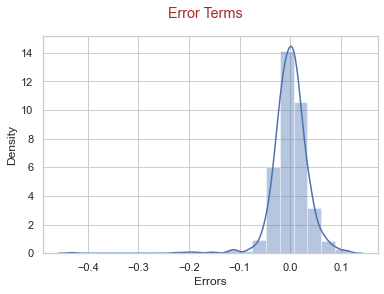

In [306]:
res_lasso=y_train-y_pred_train_lasso
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res_lasso, bins = 20)
plt.suptitle('Error Terms', fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Brown'})       # Plot heading 
plt.xlabel('Errors', fontsize = 12) 

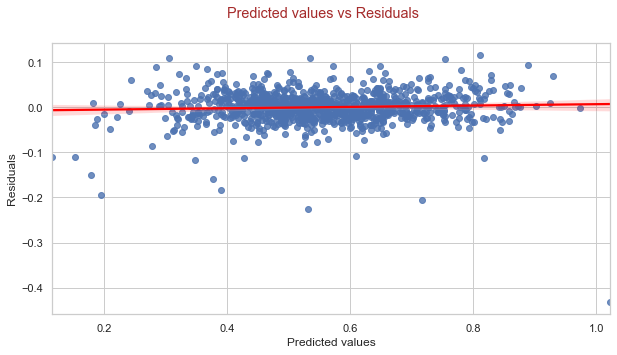

In [307]:
#Plotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure(figsize = (10, 5))
sns.regplot(y_pred_train_lasso,res_lasso, line_kws={"color": "red"})
plt.suptitle('Predicted values vs Residuals', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})  
plt.xlabel('Predicted values', fontsize=12)   
plt.ylabel('Residuals', fontsize=12)  
plt.show()

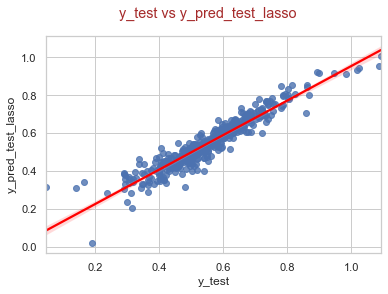

In [308]:
# Plotting y_test and y_pred_test_lasso to understand the spread and regression line
#fig = plt.figure()
sns.regplot(y_test,y_pred_test_lasso, line_kws={"color": "red"})
plt.suptitle('y_test vs y_pred_test_lasso', fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Brown'})   # Plot heading 
plt.xlabel('y_test', fontsize=12)                     # X-label
plt.ylabel('y_pred_test_lasso', fontsize=12)                     #y -label
plt.show()

### Conclusion

We built the models with all the available independent variables and used Ridge and Lasso regression techniques to regularize the models and for feature selection without doing manually by calculating VIFs or reviewing P values.

Also applied Lasso and Ridge on the features selected by RFE.

Both Ridge and Lasso performs almost similar.Here we consider Lasso Regression which was built with all the features rather than RFE one to see how all the varaibles are effecting the SalePrice and this will provide feature selection and simplifies the model by shrinking few coefficients to 0.

From Lasso, the most important predictor variables and its coefficients are:
- GrLivArea	0.3239
- OverallQual_Ex	0.0793
- GarageArea	0.0717
- MSZoning_FV	0.0603
- TotalBsmtSF	0.0568
- OverallCond_Ex	0.0496
- 1stFlrSF	0.0493
- Neighborhood_Crawfor	0.0486
- OverallQual_VeryGd	0.0481
- TotalPorchArea	0.0471
- Neighborhood_MeadowV	-0.0388
- OverallCond_Fa	-0.0605
- HouseAge	-0.0637
- OverallQual_Po	-0.0780

GrLivArea, OverallQual, GarageArea, OverallCond, Neighborhood are positively correlated with SalePrice where as KitchenAbvGrn HouseAge are negatively correlated with the target variable i.e;SalePrice


### Subjective Questions Coding

Analysis or explanation given in pdf file. Only coding is done here

#### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Doubling the alpha values and Building the models using new values


In [309]:
#Fitting Ridge model by double alpha 
rr_doublealpha=rr_alpha * 2
print(rr_doublealpha)
ridge_double = Ridge(alpha=rr_doublealpha)

ridge_double.fit(X_train, y_train)

# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train_rr2 = ridge_double.predict(X_train)
y_pred_test_rr2= ridge_double.predict(X_test)

metric_rr2 = []
r2_train_rr2 = r2_score(y_train, y_pred_train_rr2)
print("R2 Train:",r2_train_rr2)
metric_rr2.append(r2_train_rr2)

r2_test_rr2 = r2_score(y_test, y_pred_test_rr2)
print("R2 Test:",r2_test_rr2)
metric_rr2.append(r2_test_rr2)

rss1_rr2 = np.sum(np.square(y_train - y_pred_train_rr2))
print("RSS Train:",rss1_rr2)
metric_rr2.append(rss1_rr2)

rss2_rr2 = np.sum(np.square(y_test - y_pred_test_rr2))
print("RSS Test:",rss2_rr2)
metric_rr2.append(rss2_rr2)

mse_train_rr2 = np.sqrt(mean_squared_error(y_train, y_pred_train_rr2))
print("RMSE Train:",mse_train_rr2)
metric_rr2.append(mse_train_rr2)

mse_test_rr2 = np.sqrt(mean_squared_error(y_test, y_pred_test_rr2))
print("RMSE Test:",mse_test_rr2)
metric_rr2.append(mse_test_rr2)

4.0
R2 Train: 0.936558102295354
R2 Test: 0.8904757559943675
RSS Train: 1.2997200401548754
RSS Test: 0.9336689570420832
RMSE Train: 0.03583724794224561
RMSE Test: 0.04638222677843808


In [310]:
#Displaying the co-efficients of the new Ridge model
ridge_alphadouble_coeff = pd.DataFrame(np.atleast_2d(ridge_double.coef_),columns=X_train.columns)
ridge_alphadouble_coeff = ridge_alphadouble_coeff.T
ridge_alphadouble_coeff.rename(columns={0: "Ridge Double Co-Efficient"},inplace=True)
ridge_alphadouble_coeff.sort_values(by=['Ridge Double Co-Efficient'], ascending=False,inplace=True)
print(ridge_alphadouble_coeff.head(10))#positive coefficients
print(ridge_alphadouble_coeff.tail())#Negative coefficients

                      Ridge Double Co-Efficient
GrLivArea                                0.1038
1stFlrSF                                 0.0970
GarageArea                               0.0639
OverallQual_Ex                           0.0568
TotalBsmtSF                              0.0527
MSZoning_FV                              0.0458
TotalPorchArea                           0.0456
FullBath                                 0.0439
OverallCond_Ex                           0.0429
Neighborhood_Crawfor                     0.0418
                      Ridge Double Co-Efficient
LandSlope_Sev                           -0.0300
HouseAge                                -0.0318
Neighborhood_MeadowV                    -0.0346
OverallQual_Po                          -0.0446
OverallCond_Fa                          -0.0528


In [311]:
ls_double_alpha=ls_alpha * 2
print(ls_double_alpha)
lasso_double = Lasso(alpha=ls_double_alpha)
        
lasso_double.fit(X_train, y_train)
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train_ls2 = lasso_double.predict(X_train)
y_pred_test_ls2 = lasso_double.predict(X_test)

metric_ls2 = []
r2_train_ls2 = r2_score(y_train, y_pred_train_ls2)
print("R2 Train:",r2_train_ls2)
metric_ls2.append(r2_train_ls2)

r2_test_ls2 = r2_score(y_test, y_pred_test_ls2)
print("R2 Test:",r2_test_ls2)
metric_ls2.append(r2_test_ls2)

rss1_ls2 = np.sum(np.square(y_train - y_pred_train_ls2))
print("RSS Train:",rss1_ls2)
metric_ls2.append(rss1_ls2)

rss2_ls2 = np.sum(np.square(y_test - y_pred_test_ls2))
print("RSS Test:",rss2_ls2)
metric_ls2.append(rss2_ls2)

mse_train_ls2 = np.sqrt(mean_squared_error(y_train, y_pred_train_ls2))
print("RMSE Train:",mse_train_ls2)
metric_ls2.append(mse_train_ls2)

mse_test_ls2 = np.sqrt(mean_squared_error(y_test, y_pred_test_ls2))
print("RMSE Test:",mse_test_ls2)
metric_ls2.append(mse_test_ls2)

0.0002
R2 Train: 0.9287604782940975
R2 Test: 0.899637534563919
RSS Train: 1.4594682278148334
RSS Test: 0.8555669046668681
RMSE Train: 0.03797581178130943
RMSE Test: 0.04439991345600369


In [312]:
#Displaying the co-efficients of the model
lasso_double_coeff = pd.DataFrame(np.atleast_2d(lasso_double.coef_),columns=X_train.columns)
lasso_double_coeff = lasso_double_coeff.T
lasso_double_coeff.rename(columns={0: "Lasso Double Co-Efficient"},inplace=True)
lasso_double_coeff.sort_values(by=['Lasso Double Co-Efficient'], ascending=False,inplace=True)
print(lasso_double_coeff.head(10))#Positive coefficients
print(lasso_double_coeff.tail())#Negative coefficients

                      Lasso Double Co-Efficient
GrLivArea                                0.3434
GarageArea                               0.0732
OverallQual_Ex                           0.0711
TotalBsmtSF                              0.0616
Neighborhood_Crawfor                     0.0473
OverallQual_VeryGd                       0.0391
TotalPorchArea                           0.0383
1stFlrSF                                 0.0375
SaleType_New                             0.0362
OverallCond_Ex                           0.0355
                      Lasso Double Co-Efficient
OverallQual_Fa                          -0.0295
Neighborhood_MeadowV                    -0.0347
OverallQual_Po                          -0.0431
HouseAge                                -0.0516
OverallCond_Fa                          -0.0622


#### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

Deleting 5 most important predictors
- GrLivArea	0.3239
- OverallQual_Ex	0.0793
- GarageArea	0.0717
- MSZoning_FV	0.0603
- TotalBsmtSF	0.0568


In [313]:
X_train_new=X_train.drop(['MSZoning_FV','GrLivArea','OverallQual_Ex','GarageArea','TotalBsmtSF'],axis=1)
X_test_new=X_test.drop(['MSZoning_FV','GrLivArea','OverallQual_Ex','GarageArea','TotalBsmtSF'],axis=1)
# cross validation
modelthird_lcv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

modelthird_lcv.fit(X_train_new, y_train)

ls_alpha=modelthird_lcv.best_params_["alpha"]
print(ls_alpha)
lasso3_model = Lasso(alpha=ls_alpha)
lasso3_model.fit(X_train_new, y_train)
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train_ls3 = lasso3_model.predict(X_train_new)
y_pred_test_ls3 = lasso3_model.predict(X_test_new)

metric_ls3 = []
r2_train_ls3 = r2_score(y_train, y_pred_train_ls3)
print("R2 Train:",r2_train_ls3)
metric_ls3.append(r2_train_ls3)

r2_test_ls3 = r2_score(y_test, y_pred_test_ls3)
print("R2 Test:",r2_test_ls3)
metric_ls3.append(r2_test_ls3)

rss1_ls3 = np.sum(np.square(y_train - y_pred_train_ls3))
print("RSS Train:",rss1_ls3)
metric_ls3.append(rss1_ls3)

rss2_ls3 = np.sum(np.square(y_test - y_pred_test_ls3))
print("RSS Test:",rss2_ls3)
metric_ls3.append(rss2_ls3)

mse_train_ls3 = np.sqrt(mean_squared_error(y_train, y_pred_train_ls3))
print("RMSE Train:",mse_train_ls3)
metric_ls3.append(mse_train_ls3)

mse_test_ls3 = np.sqrt(mean_squared_error(y_test, y_pred_test_ls3))
print("RMSE Test:",mse_test_ls3)
metric_ls3.append(mse_test_ls3)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
0.0001
R2 Train: 0.9299361631761859
R2 Test: 0.8800977143576508
RSS Train: 1.4353822332679598
RSS Test: 1.0221393719631322
RMSE Train: 0.037661145635535145
RMSE Test: 0.04852998911222857


In [314]:
#Displaying the co-efficients of the model
lasso3_coeff = pd.DataFrame(np.atleast_2d(lasso3_model.coef_),columns=X_train_new.columns)
lasso3_coeff = lasso3_coeff.T
lasso3_coeff.rename(columns={0: "Lasso Co-Efficient"},inplace=True)
lasso3_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
print(lasso3_coeff.head(10))#Positive coefficients
print(lasso3_coeff.tail(10))#Negative coefficients

                      Lasso Co-Efficient
1stFlrSF                          0.2840
OverallCond_Ex                    0.0627
LotArea                           0.0619
FullBath                          0.0531
TotalPorchArea                    0.0530
Neighborhood_NridgHt              0.0511
Neighborhood_Crawfor              0.0482
Neighborhood_StoneBr              0.0437
2ndFlr_1                          0.0426
Neighborhood_Somerst              0.0417
                      Lasso Co-Efficient
KitchenQual_TA                   -0.0349
LandSlope_Sev                    -0.0367
GarageType_NA                    -0.0392
Neighborhood_MeadowV             -0.0412
Heating_Grav                     -0.0430
OverallQual_BelowAv              -0.0435
OverallQual_Fa                   -0.0562
OverallCond_Fa                   -0.0606
HouseAge                         -0.0647
OverallQual_Po                   -0.1167
